# Proyecto 03: Aplicaciones actuales

## Responsable: <font color='darkred'>**Juan Esteban Serna Vega**</font>  

### Asignación: <font color='darkred'>Implementar un modelo para predecir el flujo vehicular en una autopista de la Ciudad de Buenos Aires, Argentina.</font> 

### Parte A - Exploración de Datos
<div style="color:#604039; font-style: normal; font-family: Helvetica;">
Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.<br />
</div>

#### Componentes de la serie:
<div style="color:#604039; font-style: normal; font-family: Helvetica;">
    1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).<br />
    2. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.
<br />
</div>


### Parte B - Predicción a Futuro
<div style="color:#604039; font-style: normal; font-family: Helvetica;">
Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?
<br />
</div>

### Parte C - Para pensar, investigar y, opcionalmente, implementar
<div style="color:#604039; font-style: normal; font-family: Helvetica;">
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?<br />
2. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?<br />
3. ¿Hay algo que te gustaría investigar o probar?
<br />
</div>

#### Diccionario - Campos del Dataset

* `Capital Federal` refiere a la Ciudad de Buenos Aires
* **Property_type**: tipo de inmueble (Departamento, PH, Casa, Casa de campo, etc.).
* **Bedrooms**: cantidad de habitaciones del inmueble.
* **Bathrooms**: cantidad de baños que tiene la propiedad.
* **Surface_covered**: superficie cubierta en m2.
* **Surface_total**: superficie total en m2.
* **Price**: precio de cierre de venta en USD.

### 1. Preparación del Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [3]:
data_2020 = pd.read_csv('flujo-vehicular-2020.csv', sep =',')
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [4]:
data_2020.info()
data_2020.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533743 entries, 0 to 2533742
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   periodo         float64
 1   fecha           object 
 2   mes             object 
 3   dia             object 
 4   dia_fecha       float64
 5   hora_inicio     float64
 6   hora_fin        float64
 7   estacion        object 
 8   tipo_vehiculo   object 
 9   forma_pago      object 
 10  observacion     object 
 11  sentido         object 
 12  cantidad_pasos  float64
dtypes: float64(5), object(8)
memory usage: 251.3+ MB


,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
0,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Centro,24.0
1,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Provincia,80.0
2,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1.0
3,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Centro,1.0
4,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Provincia,1.0


In [5]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [6]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [7]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [8]:
print(data_2020['estacion'].unique())
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['ALBERDI' 'AVELLANEDA' 'DELLEPIANE LINIERSLEPIANE CENTRO'
 'DELLEPIANE LINIERS' 'ILLIA' 'ILP' 'PB1' 'PB3' 'PB4' 'RETIRO' 'SALGUERO'
 'SARMIENTO' 'PB2']
['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [9]:
print(data_2020['sentido'].unique())
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [10]:
print(data_2020['tipo_vehiculo'].unique())
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Auto' 'Auto con trailer' 'Moto' 'N/D' 'Pago Doble Auto'
 'Pago Doble Auto con trailer / Pesado 2 Ejes' 'Pago doble Moto'
 'Pesados 2 Ejes' 'Pesados 3 Ejes' 'Pesados 4 Ejes' 'Pesados 5 Ejes'
 'Pesados 6 Ejes']
['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [11]:
print(data_2020['forma_pago'].unique())
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['Efectivo' 'Rec.Deuda' 'Tarjeta Magnética' 'Tag' 'Exento' 'Violación'
 'CPP' 'Mercado Pago']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018, 2019 y 2020 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**

In [12]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [13]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [14]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [15]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


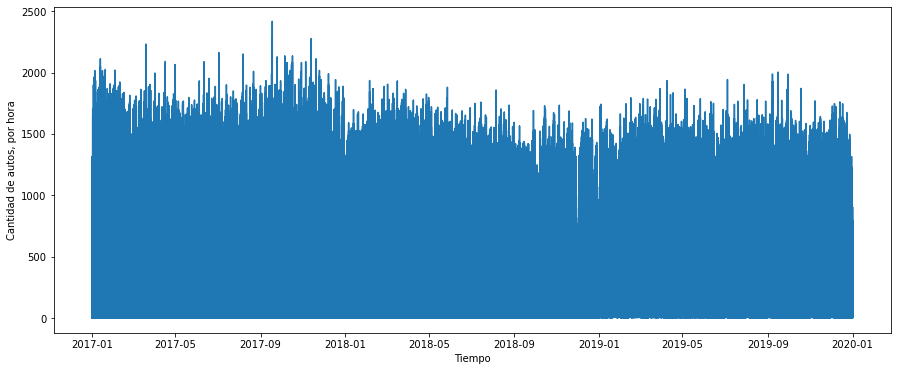

In [16]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [17]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


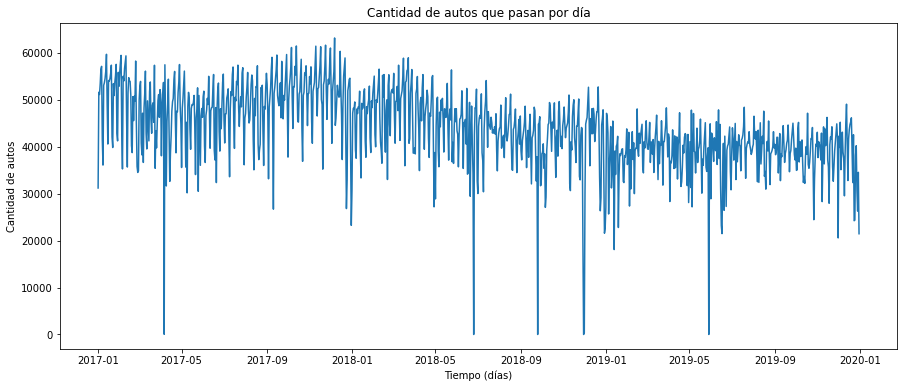

In [18]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo (días)')
plt.ylabel('Cantidad de autos')
plt.title("Cantidad de autos que pasan por día")
plt.show()

In [19]:
diario

,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486
...,...
2019-12-27,40182
2019-12-28,30681
2019-12-29,26259


<AxesSubplot:title={'center':'Trend and Seasonality'}, xlabel='fecha'>

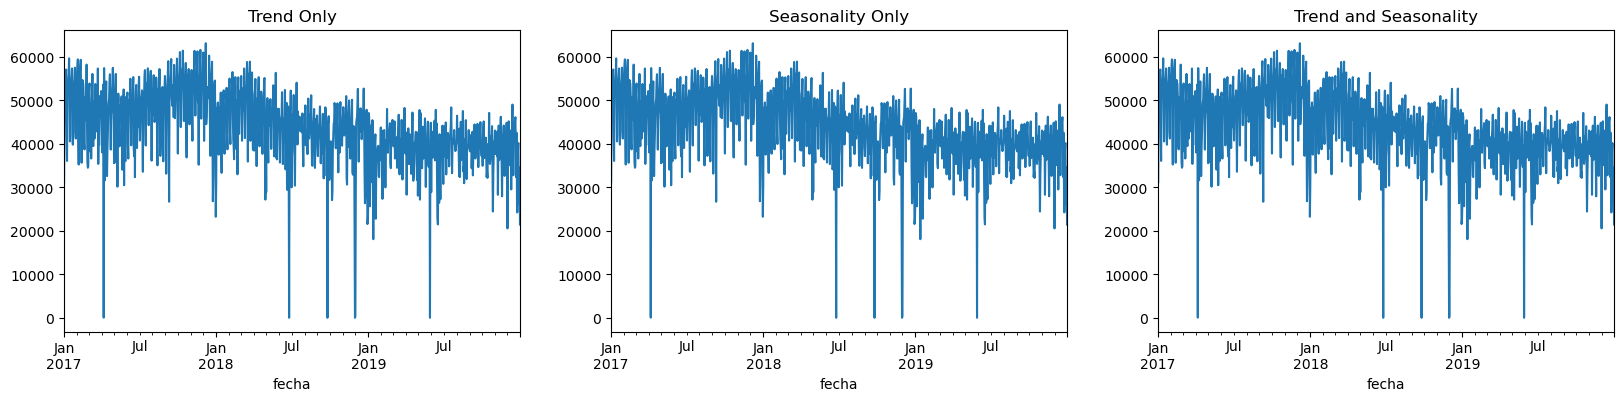

In [20]:
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)
diario.cantidad_pasos.plot(title='Trend Only', legend=False, ax=axes[0])

diario.cantidad_pasos.plot(title='Seasonality Only', legend=False, ax=axes[1])

diario.cantidad_pasos.plot(title='Trend and Seasonality', legend=False, ax=axes[2])

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = diario.cantidad_pasos
result = seasonal_decompose(series, model='additive')
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

fecha
2017-01-01             NaN
2017-01-02             NaN
2017-01-03             NaN
2017-01-04    48904.285714
2017-01-05    49601.714286
                  ...     
2019-12-27    31197.428571
2019-12-28    30801.285714
2019-12-29             NaN
2019-12-30             NaN
2019-12-31             NaN
Freq: D, Name: trend, Length: 1095, dtype: float64
fecha
2017-01-01   -6773.858616
2017-01-02   -1139.059538
2017-01-03      87.580093
2017-01-04    1914.998893
2017-01-05    3051.834973
                 ...     
2019-12-27    5279.642666
2019-12-28   -2421.138470
2019-12-29   -6773.858616
2019-12-30   -1139.059538
2019-12-31      87.580093
Freq: D, Name: seasonal, Length: 1095, dtype: float64
fecha
2017-01-01            NaN
2017-01-02            NaN
2017-01-03            NaN
2017-01-04    2512.715393
2017-01-05    3832.450741
                 ...     
2019-12-27    3704.928763
2019-12-28    2300.852756
2019-12-29            NaN
2019-12-30            NaN
2019-12-31            NaN
Freq: D,

<Figure size 676.8x633.6 with 0 Axes>

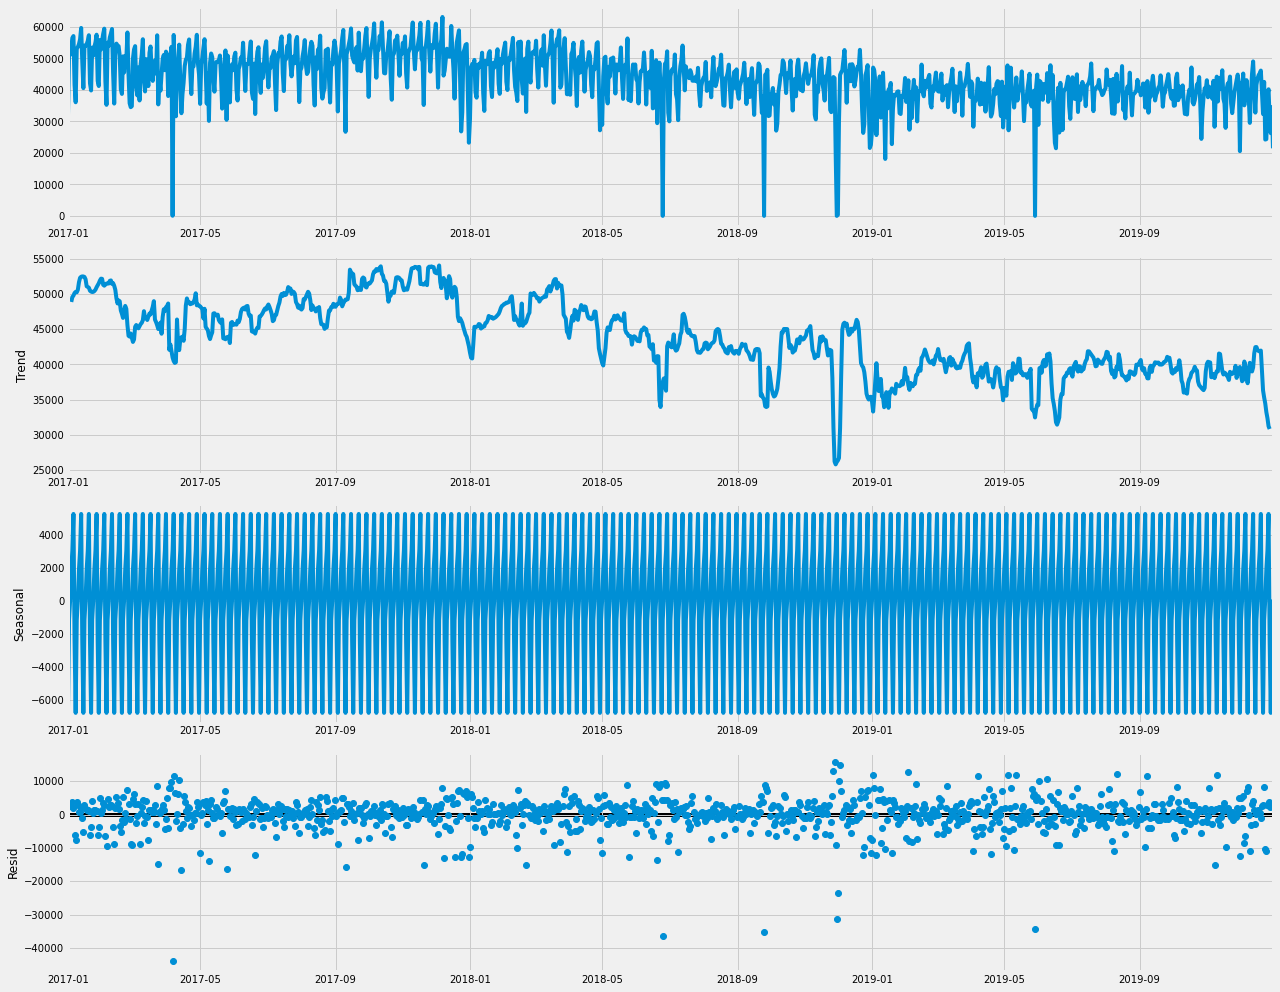

In [44]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = diario
result = seasonal_decompose(series, model='additive')
plt.figure(figsize=[9.4, 8.8])
result.plot()
pyplot.show()

#series = [i+randrange(10) for i in range(1,100)]
#result = seasonal_decompose(series, model='additive', period=1)
#result.plot()
#pyplot.show()
# Ojo: como el dataset tiene valores en ceros, no se puede aplicar la decompose multiplicativa

In [23]:
fig, ax = plt.subplots()
y_pred = reg_lin.predict(sm.add_constant(X))
ax.scatter(y, y - y_pred)
plt.axhline(y=0, color = 'black', alpha = 0.8, linestyle = '--');

NameError: name 'res' is not defined

In [36]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 12
matplotlib.rcParams['xtick.labelsize'] = 10
matplotlib.rcParams['ytick.labelsize'] = 10
matplotlib.rcParams['text.color'] = 'k'

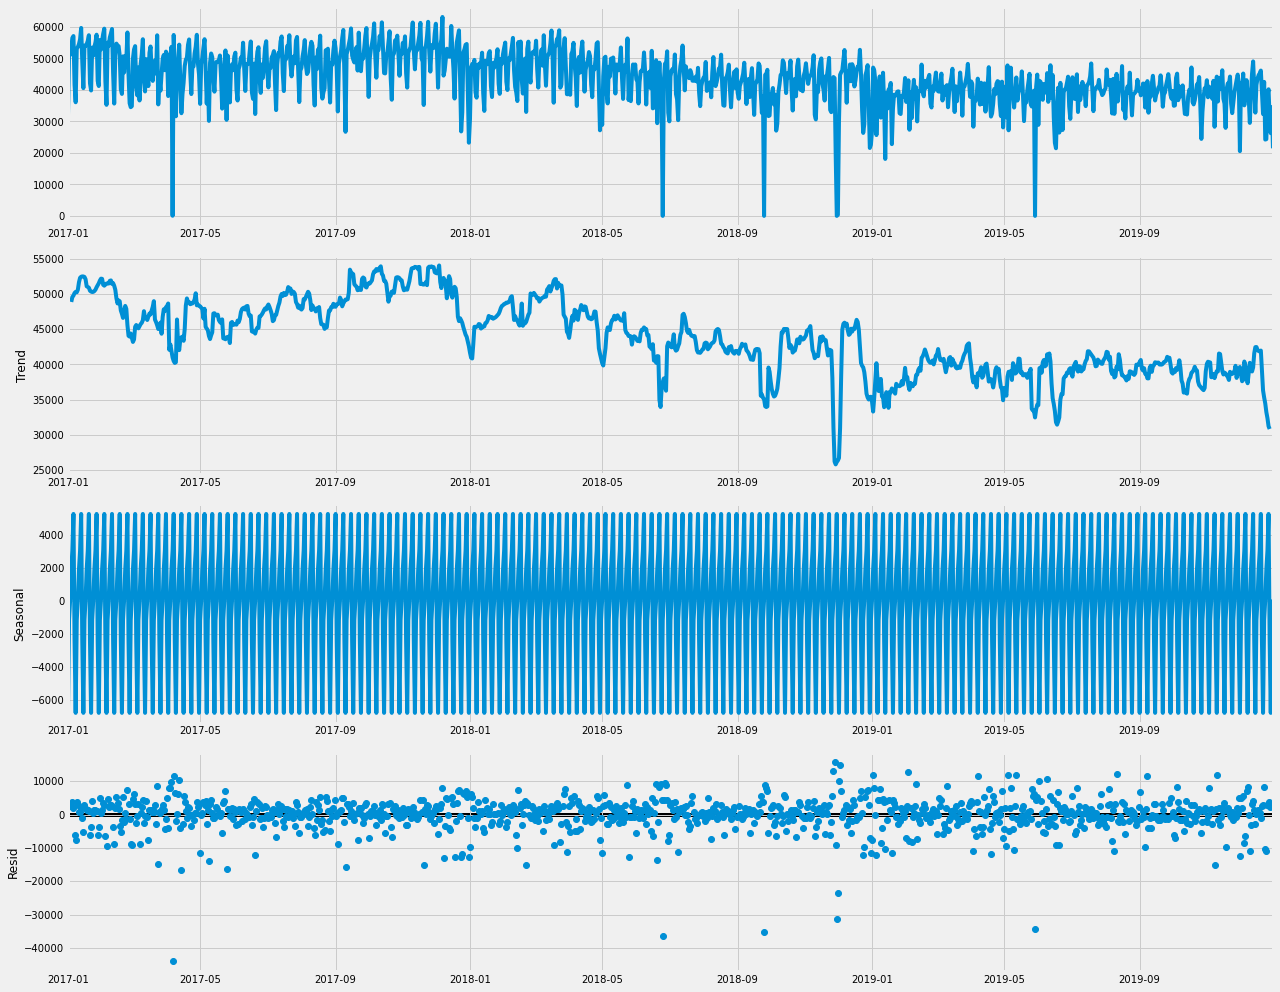

In [38]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 14
series = diario
decomposition = sm.tsa.seasonal_decompose(series, model='additive')
fig = decomposition.plot()
plt.show()

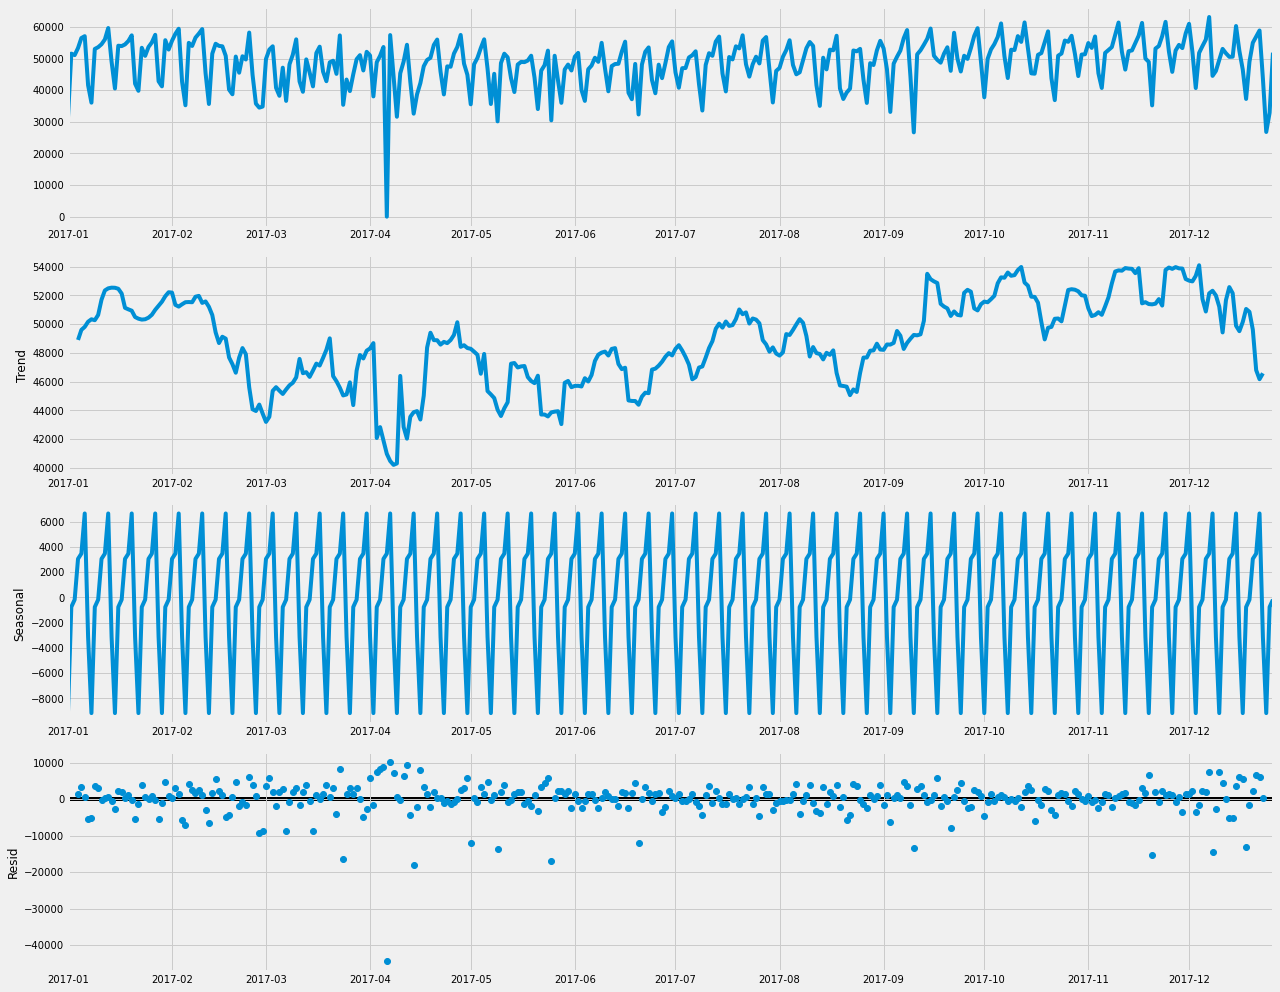

In [42]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 14
series2 = diario[0:360]
decomposition = sm.tsa.seasonal_decompose(series2, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
Se prefiere el modelo aditivo por 2 razones:
    1 porque la esttacionalidad no es creciente
    2 porque la serie tiene valores en ceros
    
    
    En general el
modelo multiplicativo es m´as apropiado que el aditivo cuando la varianza de
la serie original se incrementa (o disminuye) con el tiempo.


Hay que graficar los ciclos?

In [ ]:
# tendencia
# Estaparece ser de tendencia estocástica

# Parececiera bastante complicado modelar la tendencia conu polinomio de grado t
Como definimos previamente, la tendencia de una serie es un patr´on de
largo plazo caracterizado por la persistencia a un crecimiento o a un decrecimiento de los valores de la serie, por tanto refleja el crecimiento o declinaci´on
debido a la evoluci´on lenta de factores tecnol´ogicos, demogr´aficos, sociales,
entre otros. Cuando tal evoluci´on ocurre de forma perfectamente predecible
decimos que la tendencia es determin´ıstica, es decir, podemos identificar la
presencia de efectos permanentes sobre la serie temporal.

Las estocásticas: existen
series en las cuales una funci´on determin´ıstica para la tendencia no resulta
intr´ınseca a todo el proceso de forma que ella pueda asumirse como un patr´on
que persistir´a en el futuro. 

En series de este tipo la tendencia es impulsada por choques estoc´asticos
y no presentan un nivel particular hacia el cual tienda a regresar; la serie se
mueve hacia donde la obliguen los choques recibidos. 

tales series pueden modelarse de acuerdo a lo que se conoce como una
caminata aleatoria, en la que el valor de la serie en t es el valor de la serie en
t−1 m´as un movimiento totalmente aleatorio determinado por un ruido blanco
at. 

Si decidimos que sea deterministico

un modelo determin´ıstico para la tendencia cuando ´esta sea uniforme o suave. Cuando recurrimos a funciones polinomiales
casi siempre se usan polinomios de ´ordenes bajos para mantener suavidad en
el comportamiento, por ejemplo hasta un polinomio de orden 3, pero existen
casos d´onde la tendencia queda mejor modelada por una funci´on no lineal
diferente, por ejemplo una exponencial, es decir, Tt = β0eβ1t (reordenar fórmula pag 54 del pdf)

Si hubiera presencia de varianza, esto es si la estacionalidad fuera creciente o más pronunciada, se buscaría linealizar un poco la tendencia.
Es claro que la tranformaci´on logar´ıtmica logra
linealizar la tendencia (adem´as de estabilizar en parte la varianza), es decir
log Tt = log(β0) + β1t, as´ı, podemos en este caso ajustar un modelo de regresi´on
lineal simple para la serie transformada. Este ´ultimo modelo es conocido como
modelo de tendencia log lineal.




In [ ]:
Estimación de modelos de tendencia


Modelo polinomial (sin estacionalidad)
Modelo general de tendencia, ajuste por mínimos cuadrados
    Tendencia exponencial
    

Con estos modelos aplicados, se deberían aplicar y luego hacer el análisis de los errores para identifica que "no funcionan"


Por acá se puede empezar a hablar de modelos para pronosticar la tendencia
Se puede tomar los criterios de información de Akaike y Schwarz

Criterios AIC y BIC  el ajuste de los tres modelos mediante el AIC y BI

Se hace test de normalidad Shapiro
Se hace prueba de normalidad shapiro-wilk para los modelos de tendencia que se usaron para predecir



In [ ]:
Ahora, filtros lineales y suavizamientos

t´ecnicas utilizadas en la identificaci´on y estimaci´on de las componentes de una serie de tiempo, con las
cuales es posible modelar localmente. Esta estrategia admite cambios en los
par´ametros que definen las componentes estructurales, tales como la pendiente de una recta de tendencia, a diferencia de los modelos de regresi´on hasta
ahora vistos en los cuales se asume y estima un ´unico modelo con par´ametros
constantes para toda la serie.

Regresión Loess


Filtros lineales
medias moviles:
    media movil unilateral
    media movil bilateral
    media móvil unilateral general
    media movil bilateral general
suavizadores:
    suavizamiento exponencial simple (EWMA)
    Suavizamiento holt
    
    
Filtros de Henderson


Acá termina la tendencia.

Ahora;: modelación de la componente estacional:

        Al igual que la tendencia, la estacionalidad tb puede ser determinística o estocástica
        La estacionalidad ya vimos que puede ser aditiviva o multiplicativa
        
        
La estacionalidad se puede modelar por regresión o por funciones trigonométricas




Se habla así:
    . Claramente la serie presenta un patr´on estacional
mensual y es de componentes aditivas. Para la tendencia vamos a suponer tres
posibilidades: lineal, cuadr´atica, c ´ubic
    En todos los casos, suponemos que los errores son normales de media cero y
varianza constante

En el cap 5, con la serie de café está el ejemplo casi completo
        
    
    
     Evaluacion de la estabilidad de los modelos de pron ´ osti- c
        
        co
Cuando utilizamos un modelo de regresi´on para el ajuste de una serie de
tiempo, asumimos que las relaciones establecidas por tal modelo son estables
a lo largo del tiempo, esto es, que los par´ametros del modelo no cambian. Sin
embargo, como lo establece Diebold [1], las relaciones comerciales, industriales y econ´omicas pueden variar por lo que es necesario evaluar e identi®car los
par´ametros del modelo que son variables en el tiempo, en particular, cuando
´este contiene una componente estacional, ya que ´esta puede no ser constante

Métodos:
    EStimación recursiva
    
    
    Evaluar la precisión de los modelos de pronóstico
    MAE, RMSE, MAPE
    
    
    
Luego se habla de caracterización de los ciclos

-Procesos estacionarios en covarianza
-Procesos estrictamente estacionarios
Errores ruido blanco o no ruido blanco

Test de Box-Pierce y Test Ljung-Box

 Procesos Autorregresivos de orden 1, AR(1)
    Test Durbin-Watson de incorrelacion de orden 1
    
       
Modelos de medias móviles MA(1). Luego MA(q)
    Acá se evalúa la función de autocorrelación parcial
    
Modelos ARMA y operadores de rezago
    Acá se evalúa la función de autocorrelación parcial
 

 Modelos autorregresivos de orden p o AR(p)
Acá se evalúa la función de autocorrelación parcial


Modelos autorregresivos y de medias moviles o ARMA(p,q)
Acá se evalúa la función de autocorrelación parcial


 Casos especiales de procesos ARMA
    Acá puede haber estimación por máxima verosimilitud
    
    
Luego los modelos ARIMA

modelos SARIMA

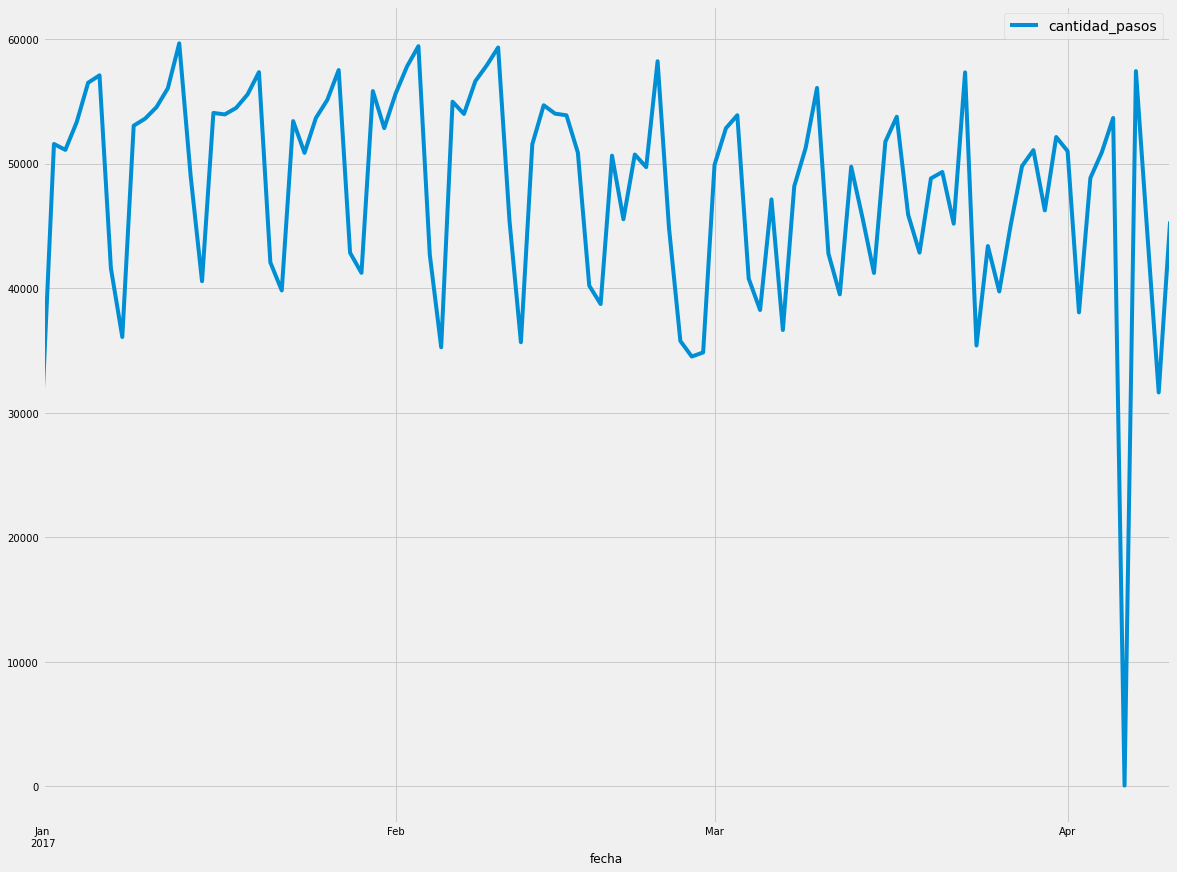

In [41]:
rcParams['figure.figsize'] = 18, 14
series2 = diario[0:100]
fig = series.plot()
plt.show()

In [39]:
series = diario[0:100]

In [ ]:
https://github.com/CristinaSacramone/Proyecto3Series-de-Tiempo

In [40]:
series

,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486
...,...
2017-04-06,40
2017-04-07,57419
2017-04-08,44409


Dataset y modelos aplicados - Proyecto 01

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from colorama import Fore
import seaborn as sns
sns.set()
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

    
data_properati = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")

# 1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
mask_a = data_properati["property_type"].str.contains("Departamento")
mask_b = data_properati["property_type"].str.contains("PH")
mask_c = data_properati["property_type"].str.contains("Casa")
filter_a = data_properati[mask_a|mask_b|mask_c]

mask_d = filter_a["l2"].str.contains("Capital Federal")
filter_b = filter_a[mask_d]
filter_b = filter_b.drop(filter_b[filter_b.property_type == "Casa de campo"].index) # Ajuste para eliminar una fila de una casa de campo

# 2. Se eliminan los registros con surface_total mayores a 1000 m2 y menores a 15 m2.
filter_b = filter_b.drop(filter_b[filter_b.surface_total > 1000].index)
filter_b = filter_b.drop(filter_b[filter_b.surface_total < 15].index)

# 3. Se eliminan aquellas propiedades cuya precio es menor a USD 4.000.000.
filter_b = filter_b.drop(filter_b[filter_b.price > 4000000].index)

# 4. Se selecciona dataset a partir de las columnas rooms, bedrooms, bathrooms, surface_total, surface_covered y price.
filter_c = filter_b[['rooms', 'bedrooms','bathrooms','surface_total','surface_covered','price']]

# 5. Se descartan aquellas instacias con valores faltantes.
filter_d = filter_c.dropna(subset=['rooms', 'bedrooms','bathrooms','surface_total','surface_covered','price'])

print(color.BOLD + 'Revisión de valores faltantes' + color.END)
print(filter_d.isna().sum())
print()
print(color.BOLD + 'Shape: ' + color.END + 'el dataset ha quedado con ' + color.BOLD + Fore.GREEN + str(filter_d.shape[0]) + Fore.BLACK + color.END + 
      ' filas de datos y ' + color.BOLD + Fore.GREEN + str(filter_d.shape[1]) + Fore.BLACK + color.END + ' columnas de datos.')
print()

Revisión de valores faltantes
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
dtype: int64

Shape: el dataset ha quedado con 81019 filas de datos y 6 columnas de datos.



Aplicación de modelos KNN y Árbol de decisión

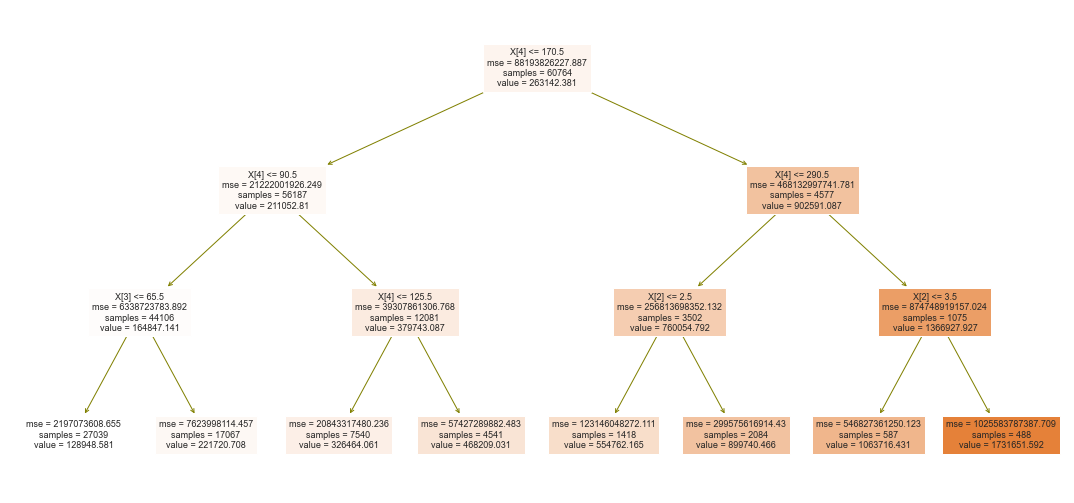

In [2]:
# Llamar el dataset (con un nuevo nombre)
data_models = filter_d

# 1. Definición de variables predictoras y variable a predecir
X = data_models.drop('price', axis=1)
y = data_models['price']

# 2. Separación de los datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Modelo KNN

# 3. Instanciar el modelo
from sklearn.neighbors import KNeighborsRegressor
n_neighbors = 15
knn = KNeighborsRegressor(n_neighbors)

# 4. Entrenar el modelo
knn.fit(X_train, y_train)

# 5. Predecir
knn_pred = knn.predict(X_test)
knn_ajuste = knn.predict(X_train)


# Modelo Árbol de decisión

# 3. Instanciar el modelo
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=3)

# 4. Entrenar el modelo
model.fit(X_train,y_train)

# 5. Predecir
tree_pred = model.predict(X_test)
tree_ajuste = model.predict(X_train)

# Gráfico del árbol

import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize = (19,9))
out = tree.plot_tree(model, filled = True,fontsize=9,impurity=True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('olive')
        arrow.set_linewidth(1)
        
plt.show()

Evaluación de modelos iniciales

In [4]:
print('Modelo KNN (hiperparámetros iniciales de 15 vecinos)')
print('r2 = ' + str(round(knn.score(X_train,y_train),3)) + ' en conjunto Train.')
print('r2 = ' + str(round(knn.score(X_test,y_test),3)) + ' en conjunto Test.')
print()

from sklearn.metrics import mean_squared_error, r2_score
# En train
mse_train_knn = mean_squared_error(y_train, knn_ajuste)
rmse_train_knn = np.sqrt(mse_train_knn)
r2_train_knn = r2_score(y_train, knn_ajuste)
# En test
mse_test_knn = mean_squared_error(y_test, knn_pred)
rmse_test_knn = np.sqrt(mse_test_knn)
r2_test_knn = r2_score(y_test, knn_pred)

print('RMSE train: ' + str(round(rmse_train_knn,3)))
print('RMSE test: ' + str(round(rmse_test_knn,3)))
print()

print('Conclusión: el modelo mejora la calidad de ajuste comparado con el ajuste inicial.')
print()
print('Mod DecTree (hiperparámetros iniciales prof 3)')
print('r2 = ' + str(round(model.score(X_train,y_train),3)) + ' en conjunto Train.')
print('r2 = ' + str(round(model.score(X_test,y_test),3)) + ' en conjunto Test.')
print()

# En train
mse_train_modeltree = mean_squared_error(y_train, tree_ajuste)
rmse_train_modeltree = np.sqrt(mse_train_modeltree)
r2_train_modeltree = r2_score(y_train, tree_ajuste)
# En test
mse_test_modeltree = mean_squared_error(y_test, tree_pred)
rmse_test_modeltree = np.sqrt(mse_test_modeltree)
r2_test_modeltree = r2_score(y_test, tree_pred)

print('RMSE train: ' + str(round(rmse_train_modeltree,3)))
print('RMSE test: ' + str(round(rmse_test_modeltree,3)))

Modelo KNN (hiperparámetros iniciales de 15 vecinos)
r2 = 0.742 en conjunto Train.
r2 = 0.711 en conjunto Test.

RMSE train: 150716.306
RMSE test: 163904.007

Conclusión: el modelo mejora la calidad de ajuste comparado con el ajuste inicial.

Mod DecTree (hiperparámetros iniciales prof 3)
r2 = 0.584 en conjunto Train.
r2 = 0.586 en conjunto Test.

RMSE train: 191479.289
RMSE test: 196171.933


### Modelos optimizados

In [5]:
print(color.BOLD + 'Modelos KNN' + color.END)
print()

# 3. Instanciar el modelo
vecinos_optimo=4
knn2 = KNeighborsRegressor(vecinos_optimo)
# 4. Entrenar el modelo
knn2.fit(X_train, y_train)
# 5. Predecir
knn2_pred = knn2.predict(X_test)
knn2_ajuste = knn2.predict(X_train)
# 6. Evaluar
print('Mod KNN opt. (' + str(vecinos_optimo) + ' vecinos)')
print('r2 = ' + str(round(knn2.score(X_train,y_train),3)) + ' en conjunto Train.')
print('r2 = ' + str(round(knn2.score(X_test,y_test),3)) + ' en conjunto Test.')
print()

# En train
mse_train_knn2 = mean_squared_error(y_train, knn2_ajuste)
rmse_train_knn2 = np.sqrt(mse_train_knn2)
r2_train_knn2 = r2_score(y_train, knn2_ajuste)
# En test
mse_test_knn2 = mean_squared_error(y_test, knn2_pred)
rmse_test_knn2 = np.sqrt(mse_test_knn2)
r2_test_knn2 = r2_score(y_test, knn2_pred)

print('RMSE train: ' + str(round(rmse_train_knn2,3)))
print('RMSE test: ' + str(round(rmse_test_knn2,3)))
print()

print('Conclusión: el modelo mejora la calidad de ajuste comparado con el ajuste inicial.')
print()
print('Mod KNN inicial (' + str(n_neighbors) + ' vecinos)')
print('r2 = ' + str(round(knn.score(X_train,y_train),3)) + ' en conjunto Train.')
print('r2 = ' + str(round(knn.score(X_test,y_test),3)) + ' en conjunto Test.')
print()

# En train
mse_train_knn = mean_squared_error(y_train, knn_ajuste)
rmse_train_knn = np.sqrt(mse_train_knn)
r2_train_knn = r2_score(y_train, knn_ajuste)
# En test
mse_test_knn = mean_squared_error(y_test, knn_pred)
rmse_test_knn = np.sqrt(mse_test_knn)
r2_test_knn = r2_score(y_test, knn_pred)

print('RMSE train: ' + str(round(rmse_train_knn,3)))
print('RMSE test: ' + str(round(rmse_test_knn,3)))
print()
print()
print()
print(color.BOLD + 'Modelos Dec. Tree' + color.END)
print()
# Ahora se ajusta el modelo de Árbol de decisión con el mejor valor de **profundidad** según lo observado en las curvas de validación.

# 3. Instanciar el modelo
from sklearn.tree import DecisionTreeRegressor
profundidad = 16
model2 = DecisionTreeRegressor(max_depth=profundidad)

# 4. Entrenar el modelo
model2.fit(X_train,y_train)

# 5. Predecir
tree2_pred = model2.predict(X_test)
tree2_ajuste = model2.predict(X_train)

# 6. Evaluar
model2.score(X_test,y_test)
print('DecTree optimizado (prof. ' + str(profundidad) + ')')
print('r2 = ' + str(round(model2.score(X_train,y_train),3)) + ' en conjunto Train.')
print('r2 = ' + str(round(model2.score(X_test,y_test),3)) + ' en conjunto Test.')
print()

# En train
mse_train_model2opt = mean_squared_error(y_train, tree2_ajuste)
rmse_train_model2opt = np.sqrt(mse_train_model2opt)
r2_train_model2opt = r2_score(y_train, tree2_ajuste)
# En test
mse_test_model2opt = mean_squared_error(y_test, tree2_pred)
rmse_test_model2opt = np.sqrt(mse_test_model2opt)
r2_test_model2opt = r2_score(y_test, tree2_pred)

print('RMSE train: ' + str(round(rmse_train_model2opt,3)))
print('RMSE test: ' + str(round(rmse_test_model2opt,3)))
print()

print('Conclusión: el modelo de DecTree mejora significativamente la calidad de ajuste comparado con el ajuste inicial.')
print()
print('DecTree inicial (prof. 3)')
print('r2 = ' + str(round(model.score(X_train,y_train),3)) + ' en conjunto Train.')
print('r2 = ' + str(round(model.score(X_test,y_test),3)) + ' en conjunto Test.')
print()

# En train
mse_train_modeltree = mean_squared_error(y_train, tree_ajuste)
rmse_train_modeltree = np.sqrt(mse_train_modeltree)
r2_train_modeltree = r2_score(y_train, tree_ajuste)
# En test
mse_test_modeltree = mean_squared_error(y_test, tree_pred)
rmse_test_modeltree = np.sqrt(mse_test_modeltree)
r2_test_modeltree = r2_score(y_test, tree_pred)

print('RMSE train: ' + str(round(rmse_train_modeltree,3)))
print('RMSE test: ' + str(round(rmse_test_modeltree,3)))

Modelos KNN

Mod KNN opt. (4 vecinos)
r2 = 0.855 en conjunto Train.
r2 = 0.756 en conjunto Test.

RMSE train: 113104.844
RMSE test: 150682.388

Conclusión: el modelo mejora la calidad de ajuste comparado con el ajuste inicial.

Mod KNN inicial (15 vecinos)
r2 = 0.742 en conjunto Train.
r2 = 0.711 en conjunto Test.

RMSE train: 150716.306
RMSE test: 163904.007



Modelos Dec. Tree

DecTree optimizado (prof. 16)
r2 = 0.943 en conjunto Train.
r2 = 0.781 en conjunto Test.

RMSE train: 70692.276
RMSE test: 142516.446

Conclusión: el modelo de DecTree mejora significativamente la calidad de ajuste comparado con el ajuste inicial.

DecTree inicial (prof. 3)
r2 = 0.584 en conjunto Train.
r2 = 0.586 en conjunto Test.

RMSE train: 191479.289
RMSE test: 196171.933


# Desarrollo del Proyecto 02

## Parte A - Transformación de datos

Incluye información de:

1. Entendimiento de los datos
    * Dimensión del dataset
    * Tipos de variables
    * Valores faltantes
2. Transformación de los datos
3. Modelo de Árbol de decisión

### 1. Entendimiento de los datos

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from colorama import Fore

import warnings
warnings.simplefilter("ignore")

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

import seaborn as sns
sns.set()

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

data_properati = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")
print()
print('El dataset tiene ' + Fore.BLUE + str(data_properati.shape[0]) + Fore.BLACK + ' filas de datos y ' + Fore.BLUE + str(data_properati.shape[1]) + Fore.BLACK + ' columnas de datos.')
print()
print('Esta es una muestra (primeras líneas) de la estructura del dataset provisto:')
print()

data_properati.head()


El dataset tiene 146660 filas de datos y 19 columnas de datos.

Esta es una muestra (primeras líneas) de la estructura del dataset provisto:



,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


Tipos de variables, valores faltantes e instancias por cada tipo de propiedad.


Tipos de variables del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  descr

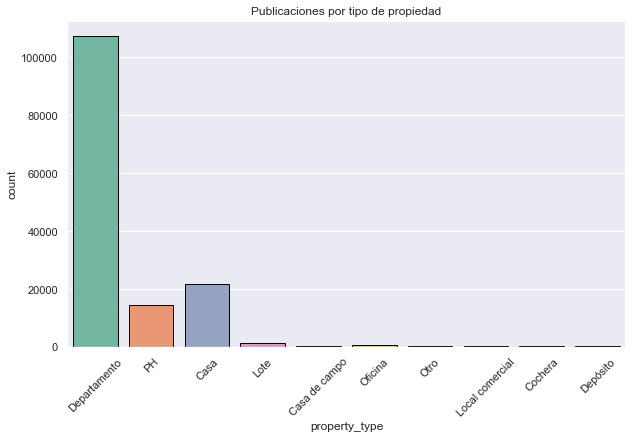

In [7]:
print()
print(color.BOLD + 'Tipos de variables del dataset' + color.END)
print()
data_properati.info()
print()
print(color.BOLD + 'Valores faltantes del dataset' + color.END)
print()
print(data_properati.isna().sum())
print()
print(color.BOLD + 'Instancias por cada tipo de propiedad:' + color.END)
print()
print(data_properati.property_type.value_counts())
print()
print()
print('Según el dataset, hay ' + Fore.BLUE + '10' + Fore.BLACK + ' tipos de propiedad publicados.')
print()
print('Los primeros tres tipos '+ Fore.GREEN + '(Departamento, PH y Casa)' + Fore.BLACK + ' comprenden el '+ Fore.BLUE + '97.6%' + Fore.BLACK + ' de los datos publicados.')
print()
plt.figure(figsize = (10,6))
plt.xticks(rotation = 45)
sns.countplot(data = data_properati, x = "property_type", linewidth=1,edgecolor=(0,0,0),palette="Set2")
plt.title('Publicaciones por tipo de propiedad')
plt.show()

Histogramas y gráficos de barras para algunas variables

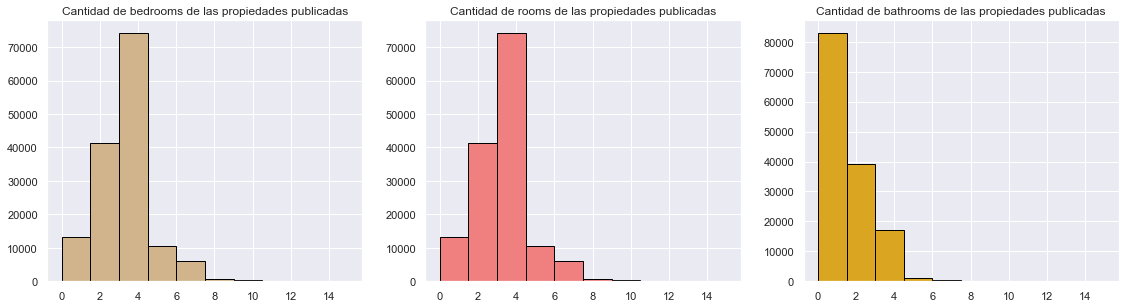


Si bien la mayoría de las publicaciones concentra los datos en valores normales, las tres variables tienen valores altos que restan precisión a un eventual un modelo fuerte de pronóstico.


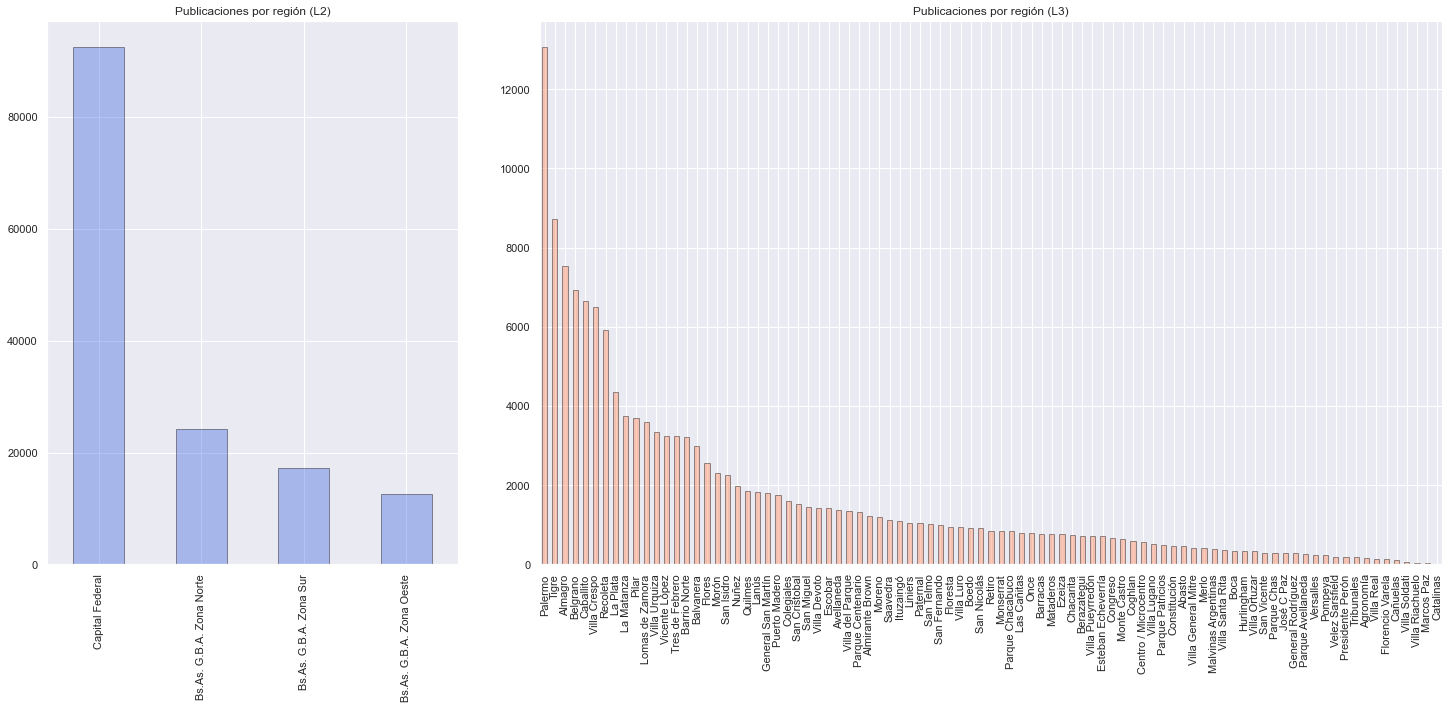


Capital Federal (Buenos Aires) aporta el 63% de los datos publicados.

*Gráficos construidos con subplot de Matplotlib




In [8]:
plt.figure(figsize = (6.4*3,4.8))
plt.subplot(1,3,1)
data_properati["rooms"].hist(range=(0,15), histtype='bar',color='tan', linewidth=1,edgecolor=(0,0,0));
plt.title('Cantidad de bedrooms de las propiedades publicadas')
plt.subplot(1,3,2)
data_properati["rooms"].hist(range=(0,15), histtype='bar',color='lightcoral', linewidth=1,edgecolor=(0,0,0));
plt.title('Cantidad de rooms de las propiedades publicadas')
plt.subplot(1,3,3)
data_properati["bathrooms"].hist(range=(0,15), histtype='bar',color='goldenrod', linewidth=1,edgecolor=(0,0,0));
plt.title('Cantidad de bathrooms de las propiedades publicadas')
plt.show()
print()
print("Si bien la mayoría de las publicaciones concentra los datos en valores " + color.BOLD + "normales" + color.END +
      ", las tres variables tienen valores altos que restan precisión a un eventual un modelo fuerte de pronóstico.")

plt.figure(figsize = (25,10))
plt.subplot2grid((2,3),(0,0), rowspan = 2)
data_properati.l2.value_counts().plot(kind='bar', alpha=0.4, color='royalblue', linewidth=1, edgecolor=(0,0,0))
plt.title('Publicaciones por región (L2)')
plt.subplot2grid((2,3),(0,1),rowspan = 5, colspan = 5)
data_properati.l3.value_counts().plot(kind='bar', alpha=0.4, color='coral', linewidth=1, edgecolor=(0,0,0))
plt.title('Publicaciones por región (L3)')
plt.show()
print()
print('Capital Federal (Buenos Aires) aporta el '+ Fore.BLUE + '63%' + Fore.BLACK + ' de los datos publicados.')
print()
print('*Gráficos construidos con subplot de Matplotlib')
print()
print()

A partir de los resultados de los dos puntos anteriores, se seleccionan los tres **tipos de propiedad** más representativos y la **región** con más propiedades publicadas.
* Tipos de propiedad más representativos: <font color='blue'>**Departamento, Casa y PH</font>**.
* Región con más propiedades publicadas: <font color='blue'>**Capital Federal</font>**.

In [9]:
mask1 = data_properati["property_type"].str.contains("Departamento")
mask2 = data_properati["property_type"].str.contains("PH")
mask3 = data_properati["property_type"].str.contains("Casa")
filter_1 = data_properati[mask1|mask2|mask3]

mask4 = filter_1["l2"].str.contains("Capital Federal")
filter_2 = filter_1[mask4]
filter_2 = filter_2.drop(filter_2[filter_2.property_type == "Casa de campo"].index) # Ajuste para eliminar una fila de una casa de campo
print()
print('Esta selección arroja un resultado de ' + Fore.BLUE + str(filter_2.shape[0]) + Fore.BLACK +' instancias y ' + Fore.BLUE + str(filter_2.shape[1]) + Fore.BLACK + ' columnas.')
print()
filter_2.head(5)


Esta selección arroja un resultado de 91485 instancias y 19 columnas.



,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta


**Checkpoint:** dataset con 91485 instancias, 19 columnas.

Columnas que se eliminan:<br />
  1. star date - created on - created on: variable que no define una determinación de precio. A igual valor estadístico para todos los datos, sin importar la fecha todos los registros tienen igual importancia estadística. Por lo tanto diversas fechas no modifican la generación del precio.
  2. Latitud - Longitud: se eliminan por su valor significativo de faltantes y por no ser una variable explícita en las negociaciones de propiedad raíz. A diferencia de las ubicaciones (barrio/secor), que sí son explícitas, latitud y longitud son tácitas.
  3. L1 - L2 - L3 - L1 columna de un único valor.
  4. Currency: todas las operaciones son en USD.
  5. Title - Description: variables descriptivas que no aportan a la implementación del modelo estadístico.
  6. Operation type: todas las operaciones son de venta.

Idea general de los valores que abarcan las variables restantes en el dataset ( `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` y `property_type`.):

In [10]:
data_properati_predictors = filter_2[['property_type','rooms', 'bedrooms','bathrooms','surface_total','surface_covered','price']]
data_properati_predictors.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485,91485,89314,82568,82250,91485
mean,2.96428,1.96028,1.56015,112.626,94.9663,259500
std,1.3147,1.07295,0.860309,980.714,778.515,322265
min,1,0,1,10,1,6000
25%,2,1,1,49,44,120000
50%,3,2,1,71,63,175000
75%,4,3,2,111,96,279000
max,26,15,14,126062,126062,3.24342e+07


Hay variables con valores que tal vez no tengan mucho sentido.

Si bien pueden ser valores reales en algunos casos, su diferencia con el promedio no ayuda en la construcción de un buen modelo de predicción.

* **Rooms**: valor max 26.
* **Bathrooms**: valor max 14. 
* **Bedrooms**: valor mínimo 0.
* **Surface_total**: valor mínimo 10 m2. Valor máximo 126.062 m2.
* **Surface_covered**:
    * Valor mínimo 1 y es muy diferente al mínimo de surface_total
    * Valor máximo 126.062 m2
* **Price**: el valor mínimo y el máximo son valores extremos.

### 2. Transformación de los datos

Transformaciones aplicadas al dataset y su justificación.<br />  

  1. **Detección y eliminación de outliers**<br />
Como se verá gráficamente, el tratamiento de outliers es necesario por la dispersión de los datos en variables como rooms, bedroom, bathrooms, precios y áreas. Con datos tan dispersos y con poca cantidad de datos en los extremos de estas variables, el ajuste y el pronóstico no representarían la potencialidad de los datos para volverse información. La detección y eliminación de outliers ayuda al modelo a tener un mejor entrenamiento y mejorar su exactitud en predicción.<br />
<br />
  2. **Encoding**<br />
Esta transformación será aplicada sobre la variable property_type por ser una variable necesaria durante el tratamiento de datos, el ajuste de modelos y las predicciones. Al ser una variable que inicialmente se presenta como texto, es necesario convertirla en numérica para la correcta aplicación de algunas técnicas de datos, entre ellas las imputaciones de faltantes por metodología estadística o KNN. El encoding permite la aplicación óptima de estas técnicas.<br />
<br />
  3. **Imputación de valores faltantes**<br />
Variables como rooms, bathrooms y bedrooms tienen una muy alta probabilidad en ser significativas en la determinación del precio. Además, tienen una cantidad inicial de datos que permiten completar los faltantes a través de diversas técnicas que se exploran líneas abajo. Las dos razones anteriores justifican el tratamiento de faltantes en estos datos.<br />
<br />

1. **Detección y eliminación de outliers**

### Variable Rooms

In [11]:
print(color.BOLD + Fore.MAGENTA + 'Propiedades por número de rooms' + Fore.MAGENTA + color.END)
data_properati_predictors["rooms"].value_counts().sort_index()

Propiedades por número de rooms


1.0      8842
2.0     27249
3.0     28327
4.0     18414
5.0      5461
6.0      1824
7.0       710
8.0       405
9.0        80
10.0       80
11.0       29
12.0       35
13.0        2
14.0        4
15.0        7
16.0        5
18.0        4
20.0        4
21.0        1
26.0        2
Name: rooms, dtype: int64

In [12]:
dptos=data_properati_predictors[data_properati_predictors["property_type"]=="Departamento"]
phs=data_properati_predictors[data_properati_predictors["property_type"]=="PH"]
casas=data_properati_predictors[data_properati_predictors["property_type"]=="Casa"]

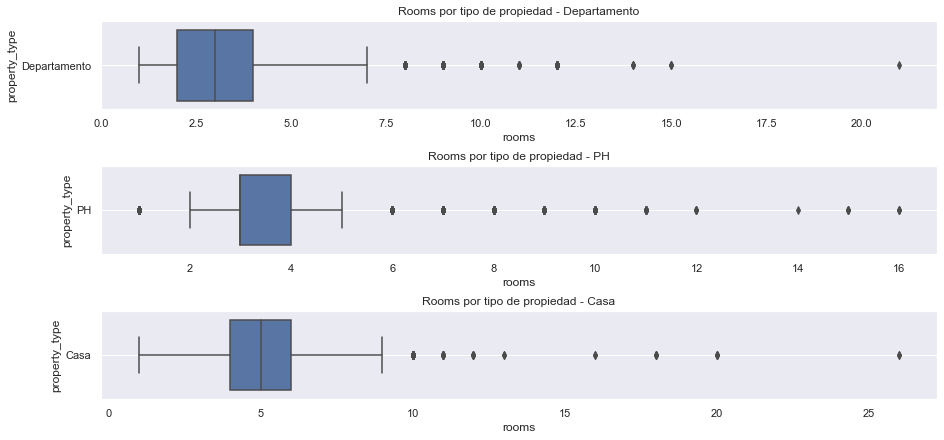

In [13]:
figure,(ax1,ax2,ax3) = plt.subplots(3,constrained_layout=True,figsize=(13,6))
ax1.set_title("Rooms por tipo de propiedad - Departamento")
ax2.set_title("Rooms por tipo de propiedad - PH")
ax3.set_title("Rooms por tipo de propiedad - Casa")
sns.boxplot(data=dptos,x="rooms",y="property_type",ax=ax1)
sns.boxplot(data=phs,x="rooms",y="property_type",ax=ax2)
sns.boxplot(data=casas,x="rooms",y="property_type",ax=ax3)
ax1.grid()
ax2.grid()
ax3.grid()
plt.show()

Variable Bathrooms

In [14]:
print(color.BOLD + Fore.MAGENTA + 'Propiedades por número de bathrooms' + Fore.MAGENTA + color.END)
data_properati_predictors["bathrooms"].value_counts().sort_index()

Propiedades por número de bathrooms


1.0     54801
2.0     23573
3.0      7645
4.0      2365
5.0       714
6.0       154
7.0        39
8.0         4
9.0         5
10.0        7
11.0        3
12.0        1
14.0        3
Name: bathrooms, dtype: int64

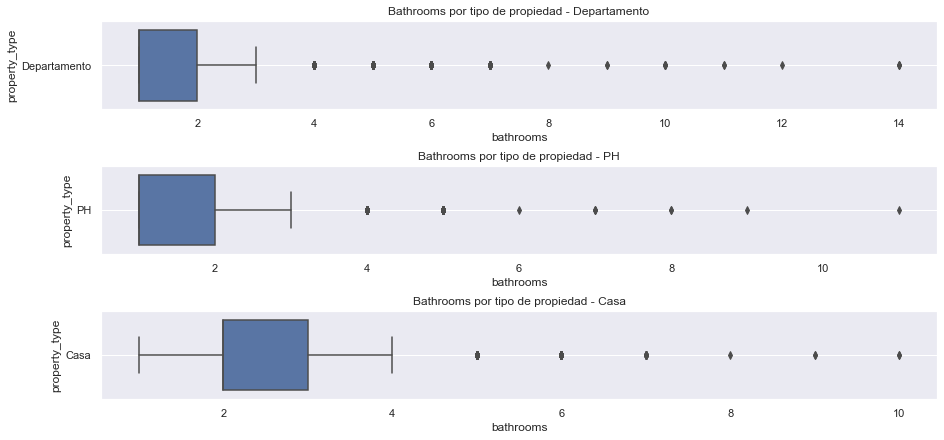

In [15]:
figure,(ax1,ax2,ax3) = plt.subplots(3,constrained_layout=True,figsize=(13,6))
ax1.set_title("Bathrooms por tipo de propiedad - Departamento")
ax2.set_title("Bathrooms por tipo de propiedad - PH")
ax3.set_title("Bathrooms por tipo de propiedad - Casa")
sns.boxplot(data=dptos,x="bathrooms",y="property_type",ax=ax1)
sns.boxplot(data=phs,x="bathrooms",y="property_type",ax=ax2)
sns.boxplot(data=casas,x="bathrooms",y="property_type",ax=ax3)
ax1.grid()
ax2.grid()
ax3.grid()
plt.show()

### Variable Bedrooms

In [16]:
print(color.BOLD + Fore.MAGENTA + 'Propiedades por número de bedrooms' + Fore.MAGENTA + color.END)
data_properati_predictors["bedrooms"].value_counts().sort_index()

Propiedades por número de bedrooms


0.0      2217
1.0     34092
2.0     29110
3.0     19786
4.0      4862
5.0       830
6.0       319
7.0       177
8.0        35
9.0        17
10.0       13
11.0        4
12.0        9
13.0        2
14.0        6
15.0        6
Name: bedrooms, dtype: int64

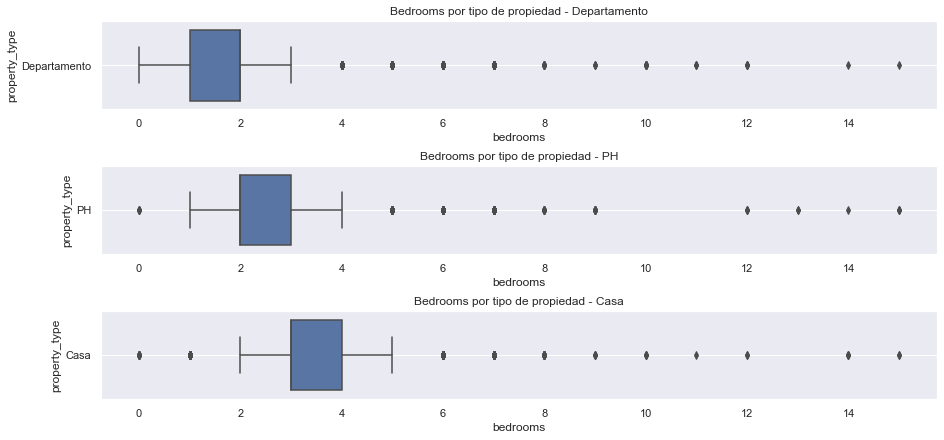

In [17]:
figure,(ax1,ax2,ax3) = plt.subplots(3,constrained_layout=True,figsize=(13,6))
ax1.set_title("Bedrooms por tipo de propiedad - Departamento")
ax2.set_title("Bedrooms por tipo de propiedad - PH")
ax3.set_title("Bedrooms por tipo de propiedad - Casa")
sns.boxplot(data=dptos,x="bedrooms",y="property_type",ax=ax1)
sns.boxplot(data=phs,x="bedrooms",y="property_type",ax=ax2)
sns.boxplot(data=casas,x="bedrooms",y="property_type",ax=ax3)
ax1.grid()
ax2.grid()
ax3.grid()
plt.show()

### Variable Surface total

Valor mínimo de surface_total: 10.0 m2
Valor máximo de surface_total: 126062.0 m2



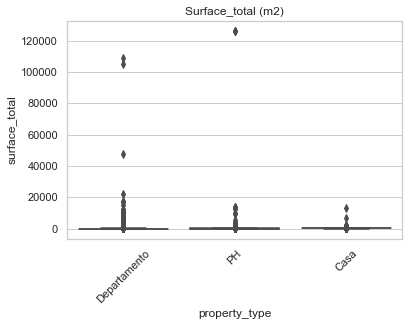


Surface_total por property_type



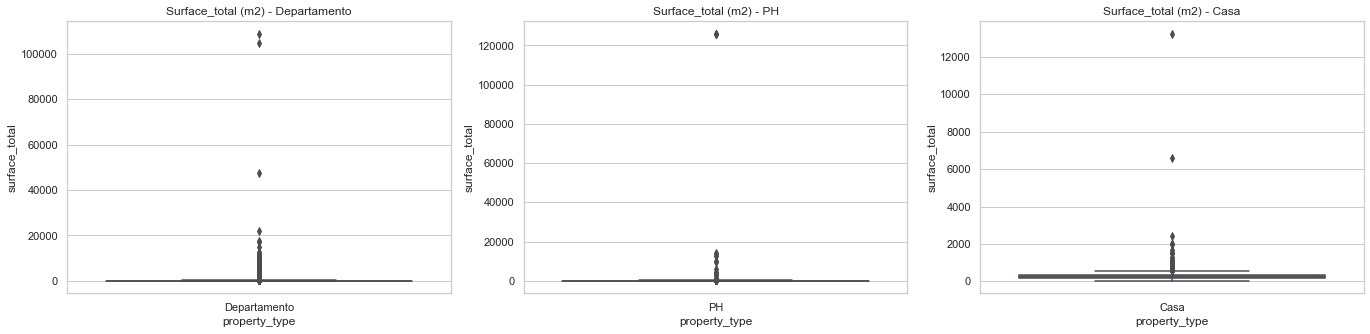

In [18]:
print('Valor mínimo de surface_total: ' + Fore.BLUE + str(data_properati_predictors.surface_total.min()) + Fore.BLACK + ' m2')
print('Valor máximo de surface_total: ' + Fore.BLUE + str(data_properati_predictors.surface_total.max()) + Fore.BLACK + ' m2')
print()
sns.set_theme(style="whitegrid")
sns.boxplot(data= filter_2, y = 'surface_total', x = 'property_type')
plt.xticks(rotation = 45)
plt.title('Surface_total (m2)')
plt.show()

# Total surface por property_type
print()
print(color.BOLD + 'Surface_total por property_type' + color.END)
print()
# Para cada tipo de inmueble.
# Departamento:
maskDep = data_properati_predictors["property_type"].str.contains("Departamento")
data_properati_predictorsDep = data_properati_predictors[maskDep]
# PH:
maskPH = data_properati_predictors["property_type"].str.contains("PH")
data_properati_predictorsPH = data_properati_predictors[maskPH]
# Casas:
maskCas = data_properati_predictors["property_type"].str.contains("Casa")
data_properati_predictorsCas = data_properati_predictors[maskCas]

plt.figure(figsize = (6.4*3,4.8))
sns.set_theme(style="whitegrid")
plt.subplot(1,3,1)
sns.boxplot(data= data_properati_predictorsDep, y = 'surface_total', x = 'property_type')
plt.title('Surface_total (m2) - Departamento')
plt.subplot(1,3,2)
sns.boxplot(data= data_properati_predictorsPH, y = 'surface_total', x = 'property_type')
plt.title('Surface_total (m2) - PH')
plt.subplot(1,3,3)
sns.boxplot(data= data_properati_predictorsCas, y = 'surface_total', x = 'property_type')
plt.title('Surface_total (m2) - Casa')
plt.tight_layout()
plt.show()

### Variable price

Valor mínimo de price: USD 6000.0
Valor máximo de price: USD 32434232.0



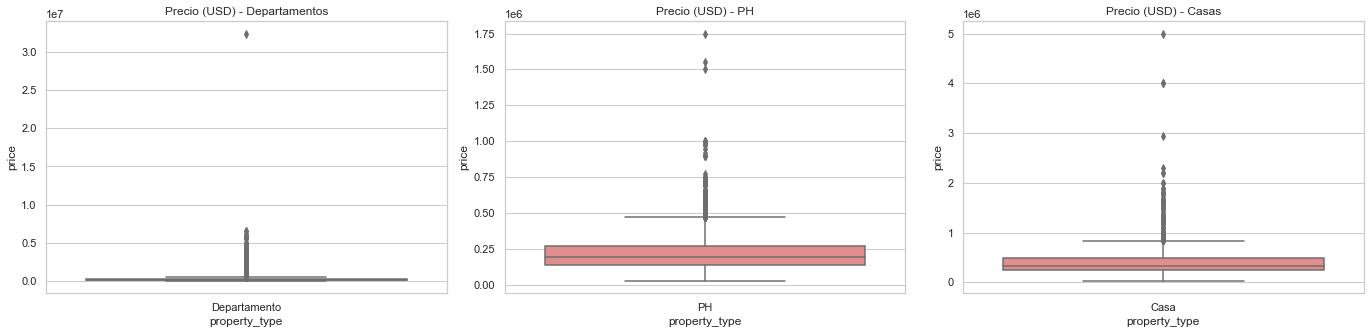

In [19]:
print('Valor mínimo de price: ' + Fore.BLUE + 'USD ' + str(data_properati_predictors.price.min()) + Fore.BLACK)
print('Valor máximo de price: ' + Fore.BLUE + 'USD ' + str(data_properati_predictors.price.max()) + Fore.BLACK)
print()
plt.figure(figsize = (6.4*3,4.8))
sns.set_theme(style="whitegrid")
plt.subplot(1,3,1)
sns.boxplot(data= data_properati_predictorsDep, y = 'price', x = 'property_type', color='lightcoral')
plt.title('Precio (USD) - Departamentos')
plt.subplot(1,3,2)
sns.boxplot(data= data_properati_predictorsPH, y = 'price', x = 'property_type', color='lightcoral')
plt.title('Precio (USD) - PH')
plt.subplot(1,3,3)
sns.boxplot(data= data_properati_predictorsCas, y = 'price', x = 'property_type', color='lightcoral')
plt.title('Precio (USD) - Casas')
plt.tight_layout()
plt.show()

Se realizan los siguientes ajustes al dataset:
* **Rooms**: Solo considerar valores entre 1 y 6 rooms. Se eliminan 1.368 registros.
* **Bathrooms**: Solo considerar valores entre 1 y 4 bathrooms. Se eliminan 714 registros.
* **Bedrooms**: eliminar las que tengan valor cero (0) y las mayores a 5. Se eliminan 2.210 registros.
* **Surface_total**: Solo considerar valores entre 20 m2 y 800 m2. Se eliminan 240 registros.
* **Surface_covered**:
    * Solo considerar valores entre 20 m2 y 800 m2
    * Ajustar a condición que nunca Surface_covered es mayor que Surface_total
* **Price**: Solo considerar valores entre USD 10.000 y USD 1.000.000 m2. Se eliminan 1.544 registros.

In [20]:
# Rooms: Solo considerar inmuebles con rooms entre:
rooms_min= 1 
rooms_max= 6

# Visualizar/dimensionar los inmuebles con rooms mayores a 6. Esto es 1.368 registros fila.
data_properati_predictors[data_properati_predictors.rooms > rooms_max]
print(data_properati_predictors[data_properati_predictors.rooms > rooms_max].shape)

# Visualizar/dimensionar los inmuebles con rooms menores a 1. Esto es 0 registros fila.
data_properati_predictors[data_properati_predictors.rooms < rooms_min]
print(data_properati_predictors[data_properati_predictors.rooms < rooms_min].shape)

# Eliminar los registros
data_properati_predictors = data_properati_predictors.drop(data_properati_predictors[data_properati_predictors.rooms > rooms_max].index)
data_properati_predictors = data_properati_predictors.drop(data_properati_predictors[data_properati_predictors.rooms < rooms_min].index)

# Validación
print(data_properati_predictors[data_properati_predictors.rooms > rooms_max].shape)
print(data_properati_predictors[data_properati_predictors.rooms < rooms_min].shape)


# Bathrooms: Solo considerar inmuebles con Bathrooms entre:
bathrooms_min= 1 
bathrooms_max= 4

# Visualizar/dimensionar los inmuebles con rooms mayores a 6. Esto es 1.368 registros fila.
data_properati_predictors[data_properati_predictors.bathrooms > bathrooms_max]
print(data_properati_predictors[data_properati_predictors.bathrooms > bathrooms_max].shape)

# Visualizar/dimensionar los inmuebles con rooms menores a 1. Esto es 0 registros fila.
data_properati_predictors[data_properati_predictors.bathrooms < bathrooms_min]
print(data_properati_predictors[data_properati_predictors.bathrooms < bathrooms_min].shape)

# Eliminar los registros
data_properati_predictors = data_properati_predictors.drop(data_properati_predictors[data_properati_predictors.bathrooms > bathrooms_max].index)
data_properati_predictors = data_properati_predictors.drop(data_properati_predictors[data_properati_predictors.bathrooms < bathrooms_min].index)

# Validación
print(data_properati_predictors[data_properati_predictors.bathrooms > bathrooms_max].shape)
print(data_properati_predictors[data_properati_predictors.bathrooms < bathrooms_min].shape)


# Bedrooms: Solo considerar inmuebles con Bedrooms entre:
bedrooms_min= 1
bedrooms_max= 5

# Visualizar/dimensionar los inmuebles con bedrooms mayores a 5. Esto es xxx registros fila.
data_properati_predictors[data_properati_predictors.bedrooms > bedrooms_max]
print(data_properati_predictors[data_properati_predictors.bedrooms > bedrooms_max].shape)

# Visualizar/dimensionar los inmuebles con bedrooms menores a 1. Esto es 2.210 registros fila.
data_properati_predictors[data_properati_predictors.bedrooms < bedrooms_min]
print(data_properati_predictors[data_properati_predictors.bedrooms < bedrooms_min].shape)

# Eliminar los registros
data_properati_predictors = data_properati_predictors.drop(data_properati_predictors[data_properati_predictors.bedrooms > bedrooms_max].index)
data_properati_predictors = data_properati_predictors.drop(data_properati_predictors[data_properati_predictors.bedrooms < bedrooms_min].index)

# Validación
print(data_properati_predictors[data_properati_predictors.bedrooms > bedrooms_max].shape)
print(data_properati_predictors[data_properati_predictors.bedrooms < bedrooms_min].shape)



# Surface_total. Solo se consideran valores (m2) entre:
st_min= 20 
st_max= 800

# Visualizar/dimensionar los inmuebles con Surface_total mayor al límite superior. Esto es 173 registros fila.
data_properati_predictors[data_properati_predictors.surface_total > st_max]
print(data_properati_predictors[data_properati_predictors.surface_total > st_max].shape)

# Visualizar/dimensionar los inmuebles con Surface_total menor al límite inferior. Esto es 102 registros fila.
data_properati_predictors[data_properati_predictors.surface_total < st_min]
print(data_properati_predictors[data_properati_predictors.surface_total < st_min].shape)

# Eliminar los registros
data_properati_predictors = data_properati_predictors.drop(data_properati_predictors[data_properati_predictors.surface_total > st_max].index)
data_properati_predictors = data_properati_predictors.drop(data_properati_predictors[data_properati_predictors.surface_total < st_min].index)

# Validación
print(data_properati_predictors[data_properati_predictors.surface_total > st_max].shape)
print(data_properati_predictors[data_properati_predictors.surface_total < st_min].shape)


# Surface_covered:
#    * Solo considerar valores (m2) entre:

sc_min= 20 
sc_max= 800

# Visualizar/dimensionar los inmuebles con Surface_covered mayor al límite superior. Esto es XXX registros fila.
data_properati_predictors[data_properati_predictors.surface_covered > sc_max]
print(data_properati_predictors[data_properati_predictors.surface_covered > sc_max].shape)

# Visualizar/dimensionar los inmuebles con Surface_covered menor al límite inferior. Esto es XXX registros fila.
data_properati_predictors[data_properati_predictors.surface_covered < sc_min]
print(data_properati_predictors[data_properati_predictors.surface_covered < sc_min].shape)

# Eliminar los registros
data_properati_predictors = data_properati_predictors.drop(data_properati_predictors[data_properati_predictors.surface_covered > sc_max].index)
data_properati_predictors = data_properati_predictors.drop(data_properati_predictors[data_properati_predictors.surface_covered < sc_min].index)

# Validación
print(data_properati_predictors[data_properati_predictors.surface_covered > sc_max].shape)
print(data_properati_predictors[data_properati_predictors.surface_covered < sc_min].shape)

#    * Ajustar a condición que nunca Surface_covered es mayor que Surface_total. Los que sean mayores, se igualan a Surface_total.
# Esta se hace más adelante.


# Price**: Solo considerar valores (USD) entre:
p_min= 10000
p_max= 1000000

# Visualizar/dimensionar los inmuebles con precio mayor al límite superior. Esto es 2.311 registros fila.
data_properati_predictors[data_properati_predictors.price > p_max]
print(data_properati_predictors[data_properati_predictors.price > p_max].shape)

# Visualizar/dimensionar los inmuebles con precio menor al límite inferior. Esto es 5 registros fila.
data_properati_predictors[data_properati_predictors.price < p_min]
print(data_properati_predictors[data_properati_predictors.price < p_min].shape)

# Eliminar los registros
data_properati_predictors = data_properati_predictors.drop(data_properati_predictors[data_properati_predictors.price > p_max].index)
data_properati_predictors = data_properati_predictors.drop(data_properati_predictors[data_properati_predictors.price < p_min].index)

# Validación
print(data_properati_predictors[data_properati_predictors.price > p_max].shape)
print(data_properati_predictors[data_properati_predictors.price < p_min].shape)

data_properati_predictors2 = data_properati_predictors # Esta línea solo se usa para facilitar los boxplot

(1368, 7)
(0, 7)
(0, 7)
(0, 7)
(714, 7)
(0, 7)
(0, 7)
(0, 7)
(24, 7)
(2206, 7)
(0, 7)
(0, 7)
(141, 7)
(99, 7)
(0, 7)
(0, 7)
(36, 7)
(129, 7)
(0, 7)
(0, 7)
(1539, 7)
(5, 7)
(0, 7)
(0, 7)


Gráficos de las variables rooms, bathrooms y bedrooms con los ajustes aplicados.

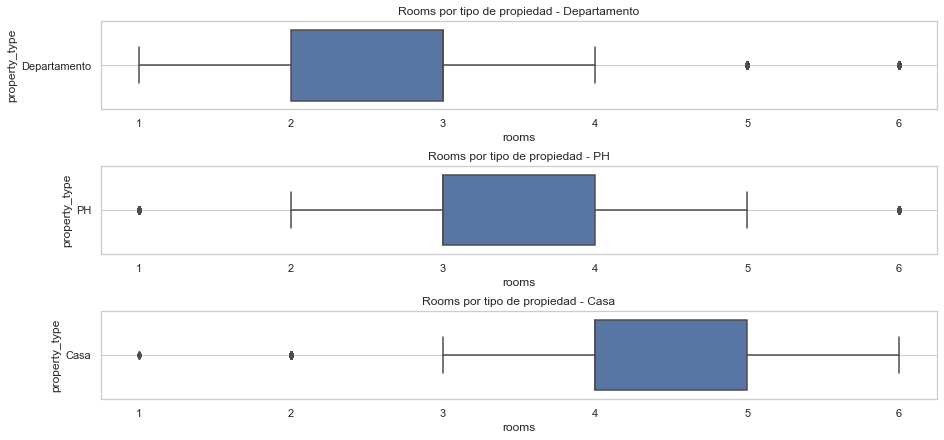

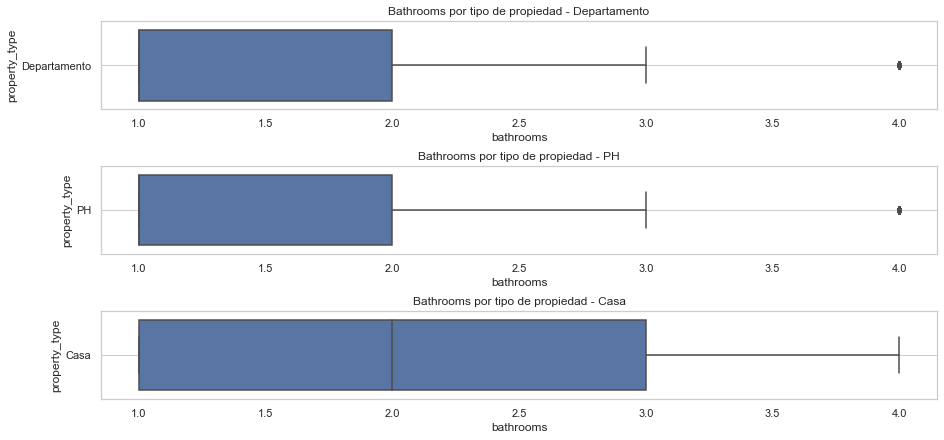

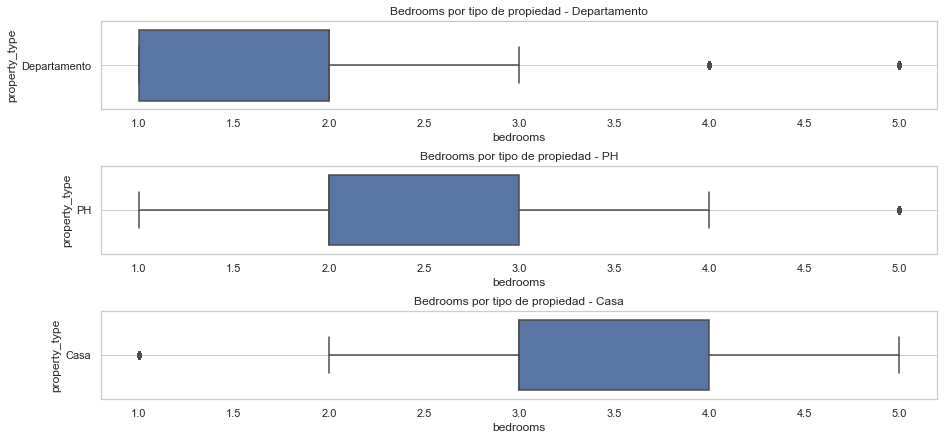

In [21]:
dptos=data_properati_predictors[data_properati_predictors["property_type"]=="Departamento"]
phs=data_properati_predictors[data_properati_predictors["property_type"]=="PH"]
casas=data_properati_predictors[data_properati_predictors["property_type"]=="Casa"]

# Rooms
figure,(ax1,ax2,ax3) = plt.subplots(3,constrained_layout=True,figsize=(13,6))
ax1.set_title("Rooms por tipo de propiedad - Departamento")
ax2.set_title("Rooms por tipo de propiedad - PH")
ax3.set_title("Rooms por tipo de propiedad - Casa")
sns.boxplot(data=dptos,x="rooms",y="property_type",ax=ax1)
sns.boxplot(data=phs,x="rooms",y="property_type",ax=ax2)
sns.boxplot(data=casas,x="rooms",y="property_type",ax=ax3)
ax1.grid()
ax2.grid()
ax3.grid()
plt.show()

# Bathrooms
figure,(ax1,ax2,ax3) = plt.subplots(3,constrained_layout=True,figsize=(13,6))
ax1.set_title("Bathrooms por tipo de propiedad - Departamento")
ax2.set_title("Bathrooms por tipo de propiedad - PH")
ax3.set_title("Bathrooms por tipo de propiedad - Casa")
sns.boxplot(data=dptos,x="bathrooms",y="property_type",ax=ax1)
sns.boxplot(data=phs,x="bathrooms",y="property_type",ax=ax2)
sns.boxplot(data=casas,x="bathrooms",y="property_type",ax=ax3)
ax1.grid()
ax2.grid()
ax3.grid()
plt.show()

# Bedrooms
figure,(ax1,ax2,ax3) = plt.subplots(3,constrained_layout=True,figsize=(13,6))
ax1.set_title("Bedrooms por tipo de propiedad - Departamento")
ax2.set_title("Bedrooms por tipo de propiedad - PH")
ax3.set_title("Bedrooms por tipo de propiedad - Casa")
sns.boxplot(data=dptos,x="bedrooms",y="property_type",ax=ax1)
sns.boxplot(data=phs,x="bedrooms",y="property_type",ax=ax2)
sns.boxplot(data=casas,x="bedrooms",y="property_type",ax=ax3)
ax1.grid()
ax2.grid()
ax3.grid()
plt.show()

Gráficos de las variables surface_total y price con los ajustes aplicados

Gráfico antes del ajuste - Surface_total



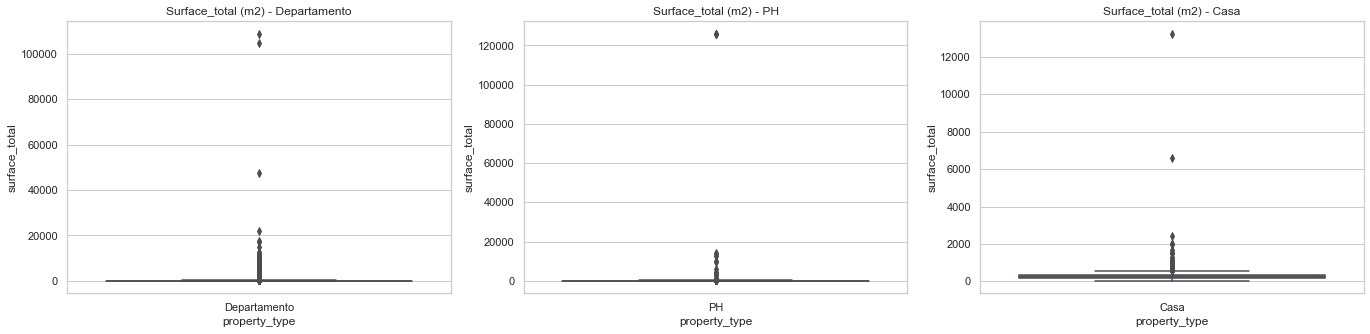



Gráfico después del ajuste - Surface_total



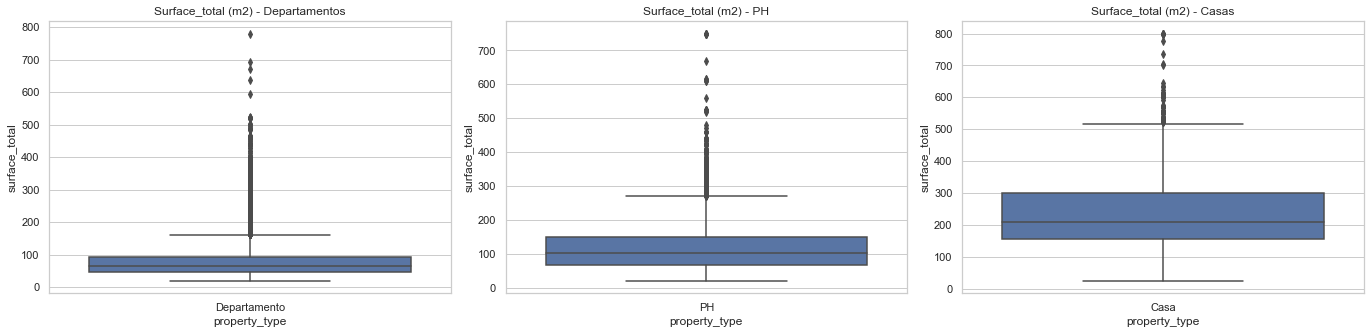


Gráficos antes del ajuste - Precios



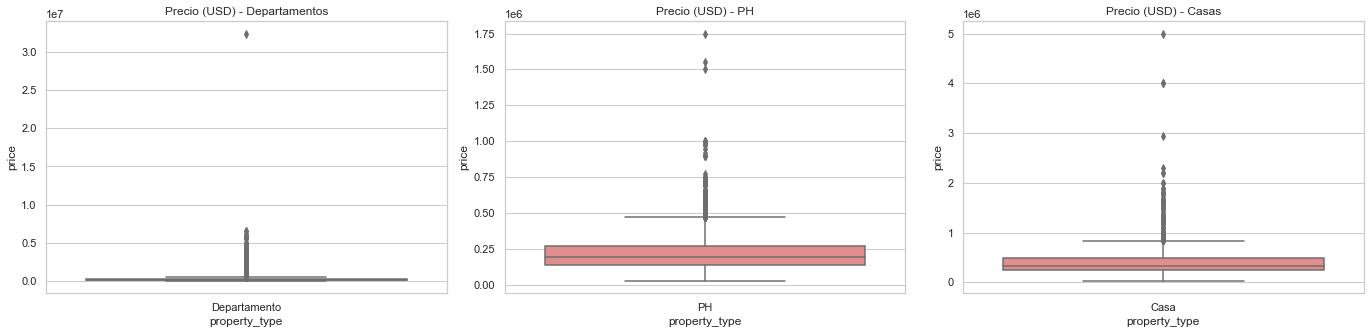

Gráficos después del ajuste - Precios



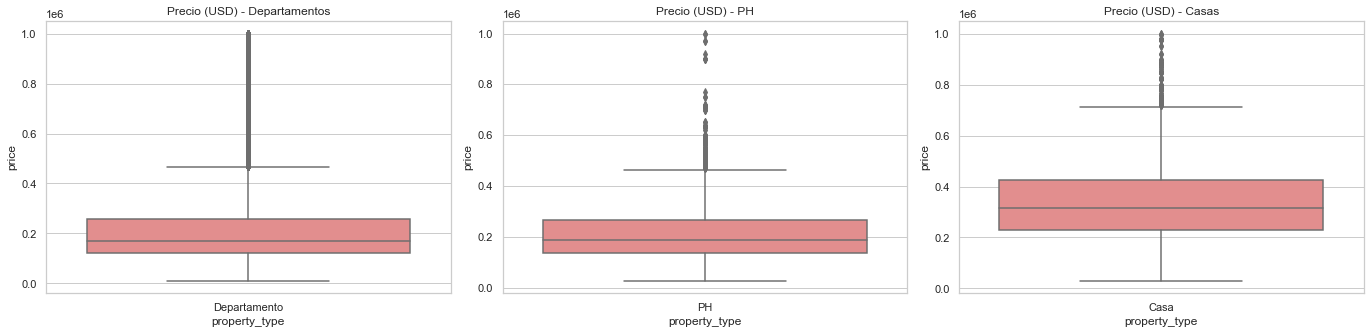

In [22]:
# Gráficos para Surface_total
print(color.BOLD + 'Gráfico antes del ajuste - ' + Fore.BLUE + 'Surface_total' + Fore.BLACK + color.END)
print()
plt.figure(figsize = (6.4*3,4.8))
sns.set_theme(style="whitegrid")
plt.subplot(1,3,1)
sns.boxplot(data= data_properati_predictorsDep, y = 'surface_total', x = 'property_type')
plt.title('Surface_total (m2) - Departamento')
plt.subplot(1,3,2)
sns.boxplot(data= data_properati_predictorsPH, y = 'surface_total', x = 'property_type')
plt.title('Surface_total (m2) - PH')
plt.subplot(1,3,3)
sns.boxplot(data= data_properati_predictorsCas, y = 'surface_total', x = 'property_type')
plt.title('Surface_total (m2) - Casa')
plt.tight_layout()
plt.show()

# Actualizo la máscara para generar los gráficos actualizados:
print()
print()
# Departamento:
maskDep2 = data_properati_predictors2["property_type"].str.contains("Departamento")
data_properati_predictorsDep2 = data_properati_predictors2[maskDep2]
# PH:
maskPH2 = data_properati_predictors2["property_type"].str.contains("PH")
data_properati_predictorsPH2 = data_properati_predictors2[maskPH2]
# Casas:
maskCas2 = data_properati_predictors2["property_type"].str.contains("Casa")
data_properati_predictorsCas2 = data_properati_predictors2[maskCas2]

# Con estos tres datos actualizados se grafica nuevamente por surface_total.
print(color.BOLD + 'Gráfico después del ajuste - ' + Fore.BLUE + 'Surface_total' + Fore.BLACK + color.END)
print()
plt.figure(figsize = (6.4*3,4.8))
sns.set_theme(style="whitegrid")
plt.subplot(1,3,1)
sns.boxplot(data= data_properati_predictorsDep2, y = 'surface_total', x = 'property_type')
plt.title('Surface_total (m2) - Departamentos')
plt.subplot(1,3,2)
sns.boxplot(data= data_properati_predictorsPH2, y = 'surface_total', x = 'property_type')
plt.title('Surface_total (m2) - PH')
plt.subplot(1,3,3)
sns.boxplot(data= data_properati_predictorsCas2, y = 'surface_total', x = 'property_type')
plt.title('Surface_total (m2) - Casas')
plt.tight_layout()
plt.show()
print()


# Gráficos para price
print(color.BOLD + 'Gráficos antes del ajuste - ' + Fore.RED + 'Precios' + Fore.BLACK + color.END)
print()
plt.figure(figsize = (6.4*3,4.8))
sns.set_theme(style="whitegrid")
plt.subplot(1,3,1)
sns.boxplot(data= data_properati_predictorsDep, y = 'price', x = 'property_type', color='lightcoral')
plt.title('Precio (USD) - Departamentos')
plt.subplot(1,3,2)
sns.boxplot(data= data_properati_predictorsPH, y = 'price', x = 'property_type', color='lightcoral')
plt.title('Precio (USD) - PH')
plt.subplot(1,3,3)
sns.boxplot(data= data_properati_predictorsCas, y = 'price', x = 'property_type', color='lightcoral')
plt.title('Precio (USD) - Casas')
plt.tight_layout()
plt.show()

print(color.BOLD + 'Gráficos después del ajuste - ' + Fore.RED + 'Precios' + Fore.BLACK + color.END)
print()
plt.figure(figsize = (6.4*3,4.8))
sns.set_theme(style="whitegrid")
plt.subplot(1,3,1)
sns.boxplot(data= data_properati_predictorsDep2, y = 'price', x = 'property_type', color='lightcoral')
plt.title('Precio (USD) - Departamentos')
plt.subplot(1,3,2)
sns.boxplot(data= data_properati_predictorsPH2, y = 'price', x = 'property_type', color='lightcoral')
plt.title('Precio (USD) - PH')
plt.subplot(1,3,3)
sns.boxplot(data= data_properati_predictorsCas2, y = 'price', x = 'property_type', color='lightcoral')
plt.title('Precio (USD) - Casas')
plt.tight_layout()
plt.show()
print()

### Encoding

Se aplica a la variable property_type.

In [23]:
data_properati_predictors.head()

,property_type,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
1,PH,2.0,1.0,2.0,70.0,58.0,159000.0
2,PH,2.0,1.0,1.0,45.0,45.0,125000.0
3,PH,2.0,1.0,1.0,85.0,50.0,295000.0
5,PH,2.0,1.0,1.0,56.0,56.0,150000.0
6,PH,2.0,1.0,1.0,70.0,70.0,159500.0


In [24]:
print(color.BOLD + Fore.CYAN + 'Valores originales en property_type:' + Fore.CYAN + color.END)
print(data_properati_predictors["property_type"].unique())
print()

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

data_properati_predictors["property_type"]=le.fit_transform(data_properati_predictors["property_type"])
print(color.BOLD + Fore.BLUE + 'Valores nuevos en property_type:' + Fore.BLUE + color.END)
print(data_properati_predictors["property_type"].unique())

Valores originales en property_type:
['PH' 'Departamento' 'Casa']

Valores nuevos en property_type:
[2 1 0]


In [25]:
data_properati_predictors.head()

,property_type,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
1,2,2.0,1.0,2.0,70.0,58.0,159000.0
2,2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2,2.0,1.0,1.0,85.0,50.0,295000.0
5,2,2.0,1.0,1.0,56.0,56.0,150000.0
6,2,2.0,1.0,1.0,70.0,70.0,159500.0


### Imputación de valores faltantes


Valores faltantes en este nuevo dataset:

property_type         0
rooms                 0
bedrooms              0
bathrooms          1794
surface_total      6911
surface_covered    7247
price                 0
dtype: int64

El shape (filas y columnas) de este nuevo dataset es: 85224 filas y 7 columnas.



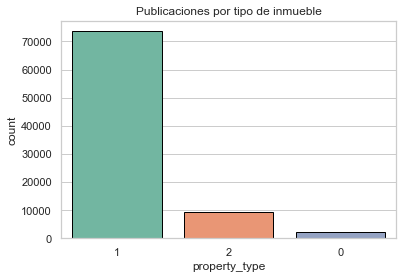

Publicaciones por tipo de inmueble

1    73641
2     9325
0     2258
Name: property_type, dtype: int64

Las publicaciones de Departamentos comprenden un 86,4% del total de las publicaciones en Buenos Aires.




In [26]:
print()
print(color.BOLD + 'Valores faltantes en este nuevo dataset:' + color.END)
print()
print(data_properati_predictors.isna().sum())
print()
print('El shape (filas y columnas) de este nuevo dataset es: ' + Fore.BLUE + str(data_properati_predictors.shape[0]) + Fore.BLACK + ' filas y ' +
      Fore.BLUE + str(data_properati_predictors.shape[1]) + Fore.BLACK + ' columnas.')
print()
sns.countplot(data = data_properati_predictors, x = "property_type", linewidth=1, edgecolor=(0,0,0), palette="Set2", order = data_properati_predictors['property_type'].value_counts().index)
plt.title('Publicaciones por tipo de inmueble')
plt.show()
print(color.BOLD + 'Publicaciones por tipo de inmueble' + color.END)
print()
print(data_properati_predictors.property_type.value_counts())
print()
print('Las publicaciones de Departamentos comprenden un ' + Fore.BLUE + '86,4%' + Fore.BLACK + ' del total de las publicaciones en Buenos Aires.')
print()
print()

**Para el tratamiento de datos faltantes se exploran tres alternativas de imputación:**
* Estadística
* Iterativa
* KNN

In [27]:
X= data_properati_predictors.drop(["price","property_type"],axis=1)
y=data_properati_predictors["price"]
X.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered
1,2.0,1.0,2.0,70.0,58.0
2,2.0,1.0,1.0,45.0,45.0
3,2.0,1.0,1.0,85.0,50.0
5,2.0,1.0,1.0,56.0,56.0
6,2.0,1.0,1.0,70.0,70.0


In [28]:
print(color.BOLD + Fore.MAGENTA + 'Imp. Estadística' + Fore.MAGENTA + color.END)
tree = DecisionTreeRegressor()
resultado = []
tipos = ['mean', 'median', 'most_frequent', 'constant']
for t in tipos:
    imputer=SimpleImputer(strategy=t)
    imputer.fit(X)
    X_trans= imputer.transform(X)
    tree = DecisionTreeRegressor(max_depth=10,random_state=42)
    tree.fit(X_trans,y)
    y_pred = tree.predict(X_trans)
    r2 = metrics.r2_score(y, y_pred)
    RMSE=np.sqrt(mean_squared_error(y,y_pred))
    resultado.append(r2)
    print("RMSE usando " + t + ": " + str(round(RMSE,2)))

print()
print(color.BOLD + Fore.MAGENTA + 'Imp. Iterativa' + Fore.MAGENTA + color.END)
tipos2 = ['ascending', 'descending', 'roman', 'arabic', 'random']
for t in tipos2:
    iter_imputer=IterativeImputer(imputation_order=t)
    iter_imputer.fit(X)
    X_iter= iter_imputer.transform(X)
    tree = DecisionTreeRegressor(max_depth=10,random_state=42)
    tree.fit(X_iter,y)
    y_pred = tree.predict(X_iter)
    r2 = metrics.r2_score(y, y_pred)
    RMSE=np.sqrt(mean_squared_error(y,y_pred))
    resultado.append(r2)
    print("RMSE usando " + t + ": " + str(round(RMSE,2)))
    
print()
print(color.BOLD + Fore.MAGENTA + 'Imp. KNN' + Fore.MAGENTA + color.END)
vecinos = [6]
for v in vecinos:
    KNN_imputer=KNNImputer(n_neighbors=v)
    KNN_imputer.fit(X)
    X_knn= KNN_imputer.transform(X)
    tree = DecisionTreeRegressor(max_depth=10,random_state=42)
    tree.fit(X_knn,y)
    y_pred = tree.predict(X_knn)
    r2 = metrics.r2_score(y, y_pred)
    RMSE=np.sqrt(mean_squared_error(y,y_pred))
    resultado.append(r2)
    print("RMSE usando " + t + ": " + str(round(RMSE,2)))

Imp. Estadística
RMSE usando mean: 77285.15
RMSE usando median: 77152.18
RMSE usando most_frequent: 76831.69
RMSE usando constant: 76459.52

Imp. Iterativa
RMSE usando ascending: 77047.77
RMSE usando descending: 77046.54
RMSE usando roman: 77047.77
RMSE usando arabic: 77046.54
RMSE usando random: 77154.5

Imp. KNN
RMSE usando random: 76504.48


A partir de los resultados obtenidos, se decide realizar la imputación de faltantes con el método KNN. Si bien el mejor método de imputación puede ser el constant (a partir del RMSE obtenido), se opta por KNN debido a la baja diferencia en RMSE y al soporte de complejidad; por lo tanto se espera una asignación de valores que mejore el ajuste general de cualquier modelo.

In [29]:
print(color.BOLD + Fore.CYAN + 'Faltantes en el Dataset (previa imputación)' + Fore.CYAN + color.END)
print(data_properati_predictors.isnull().sum())
print()

# Imputación de faltantes
KNN_imputer=KNNImputer(n_neighbors=6)
KNN_imputer=KNN_imputer.fit(data_properati_predictors.iloc[:,3:6])
data_properati_predictors.iloc[:,3:6]=KNN_imputer.transform(data_properati_predictors.iloc[:,3:6])

print(color.BOLD + Fore.BLUE + 'Faltantes en el Dataset (luego de la imputación)' + Fore.BLUE + color.END)
data_properati_predictors.isnull().sum()

Faltantes en el Dataset (previa imputación)
property_type         0
rooms                 0
bedrooms              0
bathrooms          1794
surface_total      6911
surface_covered    7247
price                 0
dtype: int64

Faltantes en el Dataset (luego de la imputación)


property_type      0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
dtype: int64

<font color='darkred'>*Observación:*</font> dado que el imputer genera números decimales en el campo Bathrooms, lo cual es un dato que no hace sentido, se utiliza la función Ceil para llevar cada cifra al entero mayor contenido.

In [30]:
print(color.BOLD + Fore.CYAN + 'Datos en el campo Bathrooms' + Fore.CYAN + color.END)
print(data_properati_predictors["bathrooms"].value_counts().sort_index())
print()

# Aplicación de la función Ceil
data_properati_predictors["bathrooms"] = data_properati_predictors["bathrooms"].apply(np.ceil)

print(color.BOLD + Fore.BLUE + 'Datos ajustados en el campo Bathrooms' + Fore.BLUE + color.END)
data_properati_predictors["bathrooms"].value_counts().sort_index()

Datos en el campo Bathrooms
1.000000    52952
1.166667       90
1.333333       64
1.485581      966
1.500000       58
1.666667       36
1.833333       42
2.000000    22863
2.166667       25
2.333333       25
2.500000       10
2.666667       13
2.833333       10
3.000000     6462
3.166667        4
3.500000        1
3.666667        2
4.000000     1601
Name: bathrooms, dtype: int64

Datos ajustados en el campo Bathrooms


1.0    52952
2.0    24119
3.0     6545
4.0     1608
Name: bathrooms, dtype: int64

Verificación de faltantes

In [31]:
print()
print(color.BOLD + Fore.GREEN + 'El dataset ya está sin valores faltantes.' + Fore.GREEN + color.END)
print()
data_properati_predictors.notnull().apply(pd.Series.value_counts)


El dataset ya está sin valores faltantes.



,property_type,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
True,85224,85224,85224,85224,85224,85224,85224


D. Variables surface_total y surface_covered

Por último, es conveniente asegurar que en ningún caso la variable surface_covered sea mayor que surface_total.

In [32]:
H = data_properati_predictors
print()
print('Hay ' + Fore.BLUE + str(H[H.surface_total < H.surface_covered].shape[0]) + Fore.BLACK + ' registros en los que surface_covered es mayor que surface_total.')
print()
print('Para estos registros, se iguala surface_covered aalvalor de surface_total')
H.loc[H['surface_covered'] > H['surface_total'],'surface_covered'] = H['surface_total']
print()
print('Validación: Ahora hay ' + Fore.BLUE + str(H[H.surface_total < H.surface_covered].shape[0]) + Fore.BLACK + ' registros en los que surface_covered es mayor que surface_total.')
print()


Hay 1402 registros en los que surface_covered es mayor que surface_total.

Para estos registros, se iguala surface_covered aalvalor de surface_total

Validación: Ahora hay 0 registros en los que surface_covered es mayor que surface_total.



Recapitulando, como resultado de la revisión de variables se ejecutaron ajustes sobre los datos, a saber:

Valores de `rooms`
   * Se eliminaron los valores mayores a 6. Esto es 1.536 registros.
   * Se eliminaron los valores menores a 1. Esto es 124 registros.

Valores de `bedrooms`
   * Se eliminaron los registros con valor 0 y las mayores a 5. Esto es 2.210 registros.

Áreas `surface_total` y `surface_total` demasiado grandes o demasiado pequeñas
   * Se eliminaron los valores fuera del rango 20 m2 a 800 m2.
   * Se ajustó el valor de Surface_covered a la Surface_total. Esto en 1.402 registros.
    
Niveles de `price` muy altos o muy bajos
   * Se eliminaron los valores fuera del rango USD 10.000 a USD 1.000.000. Esto es 1.544 registros.

Encoding
   * Se aplica encoding a la variable `property_type`

Valores faltantes
   * Imputación por KNN con posterior ajuste al entero mayor contenido en la variable Bathrooms.

**Ajuste de modelo:** Árbol de decisión - aplicado a los datos transformados

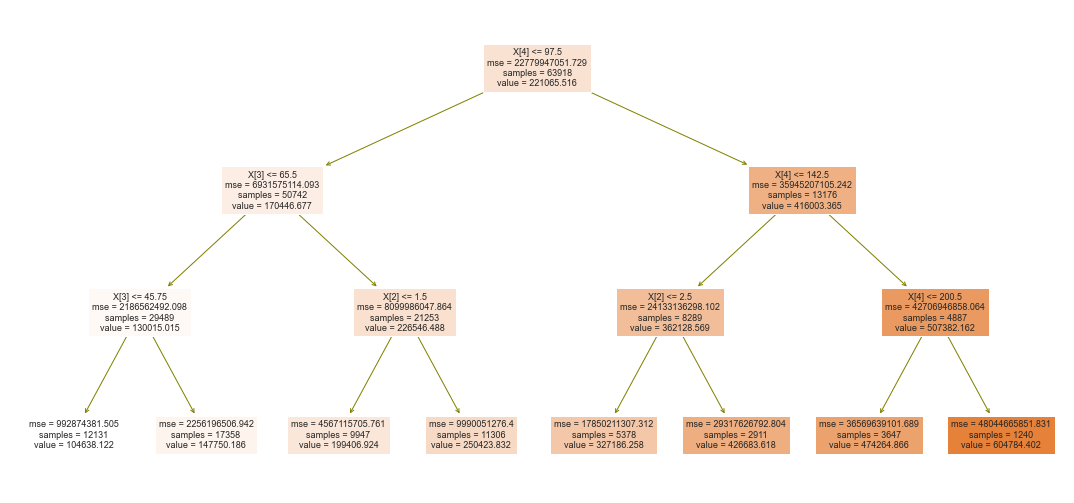

In [33]:
# Se selecciona dataset a partir de las columnas rooms, bedrooms, bathrooms, surface_total, surface_covered y price.
data = H[['rooms', 'bedrooms','bathrooms','surface_total','surface_covered','price']]

# Modelo Árbol de decisión

# Llamar el dataset (con un nuevo nombre)
#data = H

# 1. Definición de variables predictoras y variable a predecir
X = data.drop('price', axis=1)
y = data['price']

# 2. Separación de los datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
# 3. Instanciar el modelo
from sklearn.tree import DecisionTreeRegressor
modelH = DecisionTreeRegressor(max_depth=3)

# 4. Entrenar el modelo
modelH.fit(X_train,y_train)

# 5. Predecir
tree_pred = modelH.predict(X_test)
tree_ajuste = modelH.predict(X_train)

# Gráfico del árbol

import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize = (19,9))
out = tree.plot_tree(modelH, filled = True,fontsize=9,impurity=True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('olive')
        arrow.set_linewidth(1)
        
plt.show()

Evaluación y optimización del Árbol de decisión (para los datos transformados)

Evaluación del Árbol de decisión con datos transformados
r2 = 0.599 en conjunto Train.
r2 = 0.582 en conjunto Test.




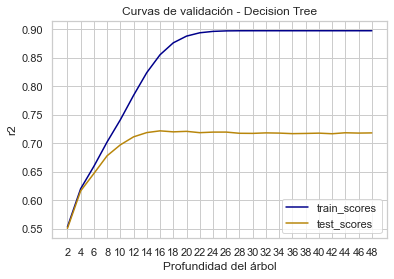


Según la curva de validación, el modelo de Árbol de decisión ofrece su mejor nivel de ajuste en profundidades de 14 a 18.



In [34]:
print(color.BOLD + 'Evaluación del Árbol de decisión con datos transformados' + color.END)
print('r2 = ' + str(round(modelH.score(X_train,y_train),3)) + ' en conjunto Train.')
print('r2 = ' + str(round(modelH.score(X_test,y_test),3)) + ' en conjunto Test.')
print()
print()

# 1. Se define un intervalo de valores o parámetros que quiero revisar:
n = np.arange(2,50,2)

# Se genera la curva de validación de Scikit Learn:
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(DecisionTreeRegressor(),
                                           X,
                                           y,
                                           param_name='max_depth',
                                           param_range=n,
                                             cv=5)

# Se revisan los parámetros de profundidad a evaluar:
np.mean(train_scores,axis=1).shape

# Se genera el gráfico
plt.plot(np.mean(train_scores,axis=1),color='darkblue',label='train_scores')
plt.plot(np.mean(test_scores,axis=1),color='darkgoldenrod',label='test_scores')
plt.xlabel('Profundidad del árbol')
plt.ylabel('r2')
plt.title('Curvas de validación - Decision Tree')
plt.xticks(np.arange(24),n);
plt.legend()
plt.show()

print()
print('Según la curva de validación, el modelo de Árbol de decisión ofrece su mejor nivel de ajuste en profundidades de 14 a 18.')
print()

In [46]:
# Ahora se ajusta el modelo de Árbol de decisión con el mejor valor de **profundidad** según lo observado en las curvas de validación.

# 3. Instanciar el modelo
from sklearn.tree import DecisionTreeRegressor
profundidadopt = 18
modelH2 = DecisionTreeRegressor(max_depth=profundidadopt)

# 4. Entrenar el modelo
modelH2.fit(X_train,y_train)

# 5. Predecir
tree2_pred = modelH2.predict(X_test)
tree2_ajuste = modelH2.predict(X_train)

# 6. Evaluar
modelH2.score(X_test,y_test)
print(color.BOLD + 'DecTree optimizado (prof. ' + str(profundidadopt) + ') - aplicado a los datos transformados' + color.END)
print('r2 = ' + str(round(modelH2.score(X_train,y_train),3)) + ' en conjunto Train.')
print('r2 = ' + str(round(modelH2.score(X_test,y_test),3)) + ' en conjunto Test.')
print()

from sklearn.metrics import mean_squared_error, r2_score
# En train
mse_train_modelh2 = mean_squared_error(y_train, tree2_ajuste)
rmse_train_modelh2 = np.sqrt(mse_train_modelh2)
r2_train_modelh2 = r2_score(y_train, tree2_ajuste)
# En test
mse_test_modelh2 = mean_squared_error(y_test, tree2_pred)
rmse_test_modelh2 = np.sqrt(mse_test_modelh2)
r2_test_modelh2 = r2_score(y_test, tree2_pred)

print('RMSE train: ' + str(round(rmse_train_modelh2,3)))
print('RMSE test: ' + str(round(rmse_test_modelh2,3)))

print()
print('DecTree optimizado (prof. ' + str(profundidad) + ') - resultado del proyecto 01')
print('r2 = ' + str(round(r2_train_model2opt,3)) + ' en conjunto Train.')
print('r2 = ' + str(round(r2_test_model2opt,3)) + ' en conjunto Test.')
print()
print('RMSE train: ' + str(round(rmse_train_model2opt,3)))
print('RMSE test: ' + str(round(rmse_test_model2opt,3)))
print()

DecTree optimizado (prof. 18) - aplicado a los datos transformados
r2 = 0.876 en conjunto Train.
r2 = 0.731 en conjunto Test.

RMSE train: 53220.112
RMSE test: 76852.715

DecTree optimizado (prof. 16) - resultado del proyecto 01
r2 = 0.943 en conjunto Train.
r2 = 0.781 en conjunto Test.

RMSE train: 70692.276
RMSE test: 142516.446



Al comparar los resultados del Árbol de decisión optimizado del proyecto 1 con el aplicado (ya optimizado) a los datos transformados del proyecto 2, se observa una notable reducción del overfitting (r2 train) sin sacrificar significativamente calidad en la predicción (r2 test).

Adicional, se regula bastante el valor de RMSE en sus valores y también en su diferencial*. Este último pasa de 73.675 a 23.975.

*Entiéndase por Diferencial: RMSE test - RMSE train*

Esta comparación demuestra que las diversas técnicas para el tratamiento de datos pueden mejorar significativamente los ajustes incluso cuando se utiliza el mismo modelo.

## Parte B - Modelos Avanzados
<div style="color:#604039; font-style: normal; font-family: Helvetica;">
Seleccionar dos de los modelos vistos. Comparar desempeño con Proyecto 01.<br />
Entrenar y evaluar con sus argumentos por defecto.<br />
* Hacer train/test split<br />
* Usar validación cruzada<br />
1. Optimizar hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.<br />
2. Comparar el desempeño de los nuevos modelos entre sí con el modelo de la Parte A. ¿Cuál seleccionar? Justificar.<br />
<br />    
Al menos un modelo debe ser optimizado por Grid Search o Random Search.<br />    
El otro puede ser optimizado por búsqueda manual (es decir, puedes dejar los mejores parámetros que encontraste probando).<br />
<br />
En la optimización de hiperparámetros, justificar los parámetros seleccionados para optimizar y el rango de cada uno.
</div>

**Modelos seleccionados**

Modelo avanzado 1: Random Forest

In [36]:
# Random Forest Default
# Se selecciona dataset a partir de las columnas rooms, bedrooms, bathrooms, surface_total, surface_covered y price.
dataset = H[['rooms', 'bedrooms','bathrooms','surface_total','surface_covered','price']]

# 1. Definición de variables predictoras y variable a predecir
X = dataset.drop('price', axis=1)
y = dataset['price']

# 2. Separación de los datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# 3. Instanciar el modelo
from sklearn.ensemble import RandomForestRegressor
rf_df = RandomForestRegressor(random_state=42)

# 4. Entrenar
rf_df.fit(X_train,y_train)

# 5. Ajustar y predecir
rf_df_ajuste = rf_df.predict(X_train)
rf_df_pred = rf_df.predict(X_test)

# 6. Evaluar el modelo
print(color.BOLD + Fore.CYAN + 'Evaluación mod. Random Forest' + Fore.CYAN + color.END)
rmse_rf_df_ajuste = np.sqrt(mean_squared_error(y_train, rf_df_ajuste))
rmse_rf_df_pred = np.sqrt(mean_squared_error(y_test, rf_df_pred))

r2_train_rf_df = metrics.r2_score(y_train, rf_df_ajuste)
print("r2 en conjunto train:",round(r2_train_rf_df,3))
r2_test_rf_df = metrics.r2_score(y_test, rf_df_pred)
print("r2 en conjunto test:",round(r2_test_rf_df,3))
print()

print("RMSE train:",round(rmse_rf_df_ajuste,3))
print("RMSE test:",round(rmse_rf_df_pred,3))

Evaluación mod. Random Forest
r2 en conjunto train: 0.885
r2 en conjunto test: 0.777

RMSE train: 51261.664
RMSE test: 70033.059


In [37]:
# Random Forest con Grid Search

rf = RandomForestRegressor(random_state=42)
params_forest = {
    "n_estimators":[500],
    "criterion":["mse"],
    "max_depth":[None],
    "max_features":["sqrt"],
    "bootstrap":[False]
}

from sklearn.model_selection import GridSearchCV

rf_gs = GridSearchCV(rf,param_grid=params_forest, cv=2,n_jobs=-1)
rf_gs.fit(X_train,y_train)

print("Mejores parámetros: "+str(rf_gs.best_params_))
print("Mejor Score: "+str(round(rf_gs.best_score_,3))+'\n')

scores = pd.DataFrame(rf_gs.cv_results_)
scores.sort_values(by="rank_test_score")

GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [False], 'criterion': ['mse'],
                         'max_depth': [None], 'max_features': ['sqrt'],
                         'n_estimators': [500]})

In [39]:
rf_gs_ajuste = rf_gs.predict(X_train)
rf_gs_pred = rf_gs.predict(X_test)

rmse_rf_gs_ajuste = np.sqrt(mean_squared_error(y_train, rf_gs_ajuste))
rmse_rf_gs_pred = np.sqrt(mean_squared_error(y_test, rf_gs_pred))

print(color.BOLD + Fore.MAGENTA + 'Evaluación mod. Random Forest (Grid Search)' + Fore.MAGENTA + color.END)
r2_train_rf_gs = metrics.r2_score(y_train, rf_gs_ajuste)
print("r2 en conjunto train:",round(r2_train_rf_gs,3))
r2_test_rf_gs = metrics.r2_score(y_test, rf_gs_pred)
print("r2 en conjunto test:",round(r2_test_rf_gs,3))

print()
print("RMSE train:",round(rmse_rf_gs_ajuste,3))
print("RMSE test:",round(rmse_rf_gs_pred,3))
print()

Evaluación mod. Random Forest (Grid Search)
r2 en conjunto train: 0.898
r2 en conjunto test: 0.779

RMSE train: 48156.06
RMSE test: 69649.605



Modelo avanzado 2: Bagging

In [40]:
from sklearn.ensemble import BaggingRegressor

bgn = BaggingRegressor(random_state=42)

par_bgn={"n_estimators":[10],"bootstrap":[True],"warm_start":[True],}

bgn_model = GridSearchCV(bgn,param_grid=par_bgn, cv=2,n_jobs=-1)
bgn_model.fit(X_train,y_train)

print("Mejores parámetros: " + str(bgn_model.best_params_))
print("Mejor Score: " + str(round((bgn_model.best_score_),3)) +'\n')

scores = pd.DataFrame(bgn_model.cv_results_)
scores.sort_values(by="rank_test_score")

Mejores parámetros: {'bootstrap': True, 'n_estimators': 10, 'warm_start': True}
Mejor Score: 0.738



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_n_estimators,param_warm_start,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.331617,0.006483,0.059842,0.000001,True,10,True,"{'bootstrap': True, 'n_estimators': 10, 'warm_...",0.737295,0.737985,0.73764,0.000345,1


In [41]:
bgn_model_ajuste = bgn_model.predict(X_train)
bgn_model_pred = bgn_model.predict(X_test)

rmse_train_bagging = np.sqrt(mean_squared_error(y_train, bgn_model_ajuste))
rmse_test_bagging = np.sqrt(mean_squared_error(y_test, bgn_model_pred))

print(color.BOLD + Fore.BLUE + 'Evaluación mod. Bagging' + Fore.BLUE + color.END)
r2_train_bgn = metrics.r2_score(y_train, bgn_model_ajuste)
print("r2 en conjunto train:",round(r2_train_bgn,3))
r2_test_bgn = metrics.r2_score(y_test, bgn_model_pred)
print("r2 en conjunto test:",round(r2_test_bgn,3))

print()
print("RMSE train:",round(rmse_train_bagging,3))
print("RMSE test:",round(rmse_test_bagging,3))

Evaluación mod. Bagging
r2 en conjunto train: 0.879
r2 en conjunto test: 0.769

RMSE train: 52433.748
RMSE test: 71289.636


## *Resumen general de modelos*

In [42]:
print()
print('Modelos - Proyecto 1 ')
print()
print(color.BOLD + 'Modelos iniciales' + color.END)
print('Modelo KNN (hiperparámetros iniciales de 15 vecinos)')
print('r2 = ' + str(round(r2_train_knn,3)) + ' en conjunto Train.')
print('r2 = ' + str(round(r2_test_knn,3)) + ' en conjunto Test.')
print('RMSE train: ' + str(round(rmse_train_knn,3)))
print('RMSE test: ' + str(round(rmse_test_knn,3)))
print()
print('Mod DecTree (hiperparámetros iniciales prof 3)')
print('r2 = ' + str(round(r2_train_modeltree,3)) + ' en conjunto Train.')
print('r2 = ' + str(round(r2_test_modeltree,3)) + ' en conjunto Test.')
print('RMSE train: ' + str(round(rmse_train_modeltree,3)))
print('RMSE test: ' + str(round(rmse_test_modeltree,3)))
print()
print(color.BOLD + 'Modelos optimizados' + color.END)
print('Mod KNN opt. (' + str(vecinos_optimo) + ' vecinos)')
print('r2 = ' + str(round(r2_train_knn2,3)) + ' en conjunto Train.')
print('r2 = ' + str(round(r2_test_knn2,3)) + ' en conjunto Test.')
print()
print('RMSE train: ' + str(round(rmse_train_knn2,3)))
print('RMSE test: ' + str(round(rmse_test_knn2,3)))
print()
print('DecTree optimizado (prof. ' + str(profundidad) + ')')
print('r2 = ' + str(round(r2_train_model2opt,3)) + ' en conjunto Train.')
print('r2 = ' + str(round(r2_test_model2opt,3)) + ' en conjunto Test.')
print()
print('RMSE train: ' + str(round(rmse_train_model2opt,3)))
print('RMSE test: ' + str(round(rmse_test_model2opt,3)))
print()
print()
print()
print('Modelos con los datos transformados - Parte A Proyecto 2')
print()
print('DecTree optimizado (prof. ' + str(profundidadopt) + ')')
print('r2 = ' + str(round(r2_train_modelh2,3)) + ' en conjunto Train.')
print('r2 = ' + str(round(r2_test_modelh2,3)) + ' en conjunto Test.')
print()
print('RMSE train: ' + str(round(rmse_train_modelh2,3)))
print('RMSE test: ' + str(round(rmse_test_modelh2,3)))
print()
print()
print()
print('Modelos avanzados - Parte B Proyecto 2')
print()
print(color.BOLD + Fore.CYAN + 'Random Forest (Default)' + Fore.CYAN + color.END)
print("r2 en conjunto train:",round(r2_train_rf_df,3))
print("r2 en conjunto test:",round(r2_test_rf_df,3))
print()
print("RMSE train:",round(rmse_rf_df_ajuste,3))
print("RMSE test:",round(rmse_rf_df_pred,3))
print()
print(color.BOLD + Fore.MAGENTA + 'Random Forest (Grid Search)' + Fore.MAGENTA + color.END)
print("r2 en conjunto train:",round(r2_train_rf_gs,3))
print("r2 en conjunto test:",round(r2_test_rf_gs,3))
print()
print("RMSE train:",round(rmse_rf_gs_ajuste,3))
print("RMSE test:",round(rmse_rf_gs_pred,3))
print()
print(color.BOLD + Fore.BLUE + 'Bagging' + Fore.BLUE + color.END)
print("r2 en conjunto train:",round(r2_train_bgn,3))
print("r2 en conjunto test:",round(r2_test_bgn,3))
print()
print("RMSE train:",round(rmse_train_bagging,3))
print("RMSE test:",round(rmse_test_bagging,3))
print()


Modelos - Proyecto 1 

Modelos iniciales
Modelo KNN (hiperparámetros iniciales de 15 vecinos)
r2 = 0.742 en conjunto Train.
r2 = 0.711 en conjunto Test.
RMSE train: 150716.306
RMSE test: 163904.007

Mod DecTree (hiperparámetros iniciales prof 3)
r2 = 0.584 en conjunto Train.
r2 = 0.586 en conjunto Test.
RMSE train: 191479.289
RMSE test: 196171.933

Modelos optimizados
Mod KNN opt. (4 vecinos)
r2 = 0.855 en conjunto Train.
r2 = 0.756 en conjunto Test.

RMSE train: 113104.844
RMSE test: 150682.388

DecTree optimizado (prof. 16)
r2 = 0.943 en conjunto Train.
r2 = 0.781 en conjunto Test.

RMSE train: 70692.276
RMSE test: 142516.446



Modelos con los datos transformados - Parte A Proyecto 2

DecTree optimizado (prof. 18)
r2 = 0.876 en conjunto Train.
r2 = 0.732 en conjunto Test.

RMSE train: 53220.112
RMSE test: 76719.811



Modelos avanzados - Parte B Proyecto 2

Random Forest (Default)
r2 en conjunto train: 0.885
r2 en conjunto test: 0.777

RMSE train: 51261.664
RMSE test: 70033.059

Ra

### Comparación de resultados entre modelos seleccionados (modelo 1 y modelo 2) con el Árbol de decisión de la Parte A.

Al comparar los resultados del Árbol de decisión optimizado en la parte A del proyecto 02 con los modelos avanzados, no se encuentran mejoras sustanciales en la calidad del ajuste. Se observa una capacidad de predicción ligeramente mayor.

Similarmente, se observa una mejora en el diferencial de RMSE (RMSE test - RMSE train) sin ser altamente mejor en los modelos avanzados.

## Parte C - Interpretación de modelos
<div style="color:#604039; font-style: normal; font-family: Helvetica;">
De acuerdo a lo que el modelo permite, responder:<br />
* ¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no?<br />
* Si se usó una regresión lineal con regularización, prestar atención a los parámetros (pendientes) obtenidas. Si se usó un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también seleccionar algunos árboles al azar y observar qué atributos se consideran importantes. ¿En qué se diferencian esos árboles? ¿Por qué?<br />
* ¿Coincide con lo que esperabas a partir de tu experiencia con este dataset?<br />
* ¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?<br /> 
<br /> 
Responder al menos una pregunta.<br /> 
<br />
Otras consideraciones:<br />
    1. Estudiar qué variables utiliza el modelo para predecir y responder la pregunta: ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?<br />
    2. Es muy importante analizar los errores del modelo. ¿Dónde es mayor el error? ¿dónde acierta?<br />
    3. Hay que ser crítico/a con la metodología utilizada. ¿Qué mejorarías? Tener en cuenta siempre terminar con una discusión sobre lo realizado y conclusiones obtenidas.<br />
</div> 

Asumiendo el r2 y RMSE como parámetros principales de evaluación, se concluye que el modelo Random Forest (con GridSearch) es el que ofrece los mejores resultados generales (ajuste y predicción) sobre el dataset.

**¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no?**

Las variables más representativas para el modelo fueron surface_covered y surface_total. Causa algo de sorpresa que bedrooms tenga tan poca significancia en la predicción (0.024). A continación los valores.


Index(['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered'], dtype='object')
[0.05852262 0.02396328 0.14613522 0.33474008 0.43663881]



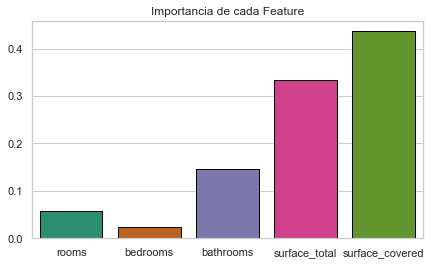

In [43]:
# Importancia de las features del modelo

# Valores
print()
print(X.columns)
print(rf_gs.best_estimator_.feature_importances_)

# Gráficamente
print()
importances = rf_gs.best_estimator_.feature_importances_
#importances = rf_df.feature_importances_
columns = X.columns
plt.figure(figsize = (7,4))
sns.barplot(columns, importances, linewidth=1,edgecolor=(0,0,0),palette="Dark2")
plt.title('Importancia de cada Feature')
plt.show()

**¿Coincide con lo que esperabas a partir de tu experiencia con este dataset?**

El modelo Random forest GridSearch es el que logra el mejor desempeño en r2 y regula bastante bien el RMSE en comparación con los demás modelos. Los modelos de Random Forest default y Bagging presentan r2 y RMSE ligeramente de menor calidad, pero logran un diferencial de RMSE más bajo que el Random Forest GridSearch.

Sin embargo, tanto en el modelo RF con GridSearch, como en los demás modelos, sigue habiendo un desbalance importante entre el RMSE de train y de test (21.493). Un diferencial de esta magnitud es signo de que puede haber alto sesgo y varianza. Un valor de diferencial entre los 3.000 y 7.000 mostraría una calidad bastante mayor en la predicción y otorgaría un intervalo de error aceptable para negociaciones de propiedad raíz.

Más allá de la baja significancia de bedrooms como variable para predicción, los demás hallazgos no ofrecen mayores novedades.

**¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?**

Dado el uso de un modelo complejo, como es el Random Forest con GridSearch, y el alto diferencial en los resultados de RMSE (RMSE test - RMSE train), es posible decir que el modelo tiene sesgo bajo y varianza alta. 

De forma general se podría buscar reducciones en varianza a partir de mayores datos para entrenamiento, creación de nuevas features o variables sintéticas, o disminuyendo la complejidad del modelo.

Similarmente, tratamientos adicionales sobre los datos (como el escalado de datos) y mayor ingeniería de features podría mejorar el desempeño del modelo sin aumentar su complejidad.

**Aprendizajes y comentarios sobre la metodología**

Si bien es cierto que aún no se consigue un desempeño óptimo sobre el dataset, también vale decir que se está cerca del máximo en aprovechamiento de la predictibilidad de los datos. Esto es, cualquier ganancia adicional en desempeño implicará una mayor complejidad del modelo aplicado.

Si bien en aplicaciones en industria de estos modelos se busca tener una predicción certera, es imposible obtener un precio exacto que iguale las negociaciones de un mercado. El objetivo se vuelve entonces encontrar un precio de referencia, que será el parámetro inicial para negociaciones y posterior definición de un valor final de cierre de la compra/venta.